# Laplace's Notebook

## Installing / importing python packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.preprocessing import MinMaxScaler

## Useful Functions

In [2]:
# Check the number of missing values
def checkNaQntd(columns, df):
    for column in columns:
        naCount = df[column].isna().sum()
        print(f'Column: {column} // Missing values: {naCount}')

def basic_analysis(data, column, count = True):
    print(f'Number of unique values: {data[column].nunique()}')
    print(f'\nWhat are the unique values: {data[column].unique()}')
    print(f'\nNumber of null values: {data[column].isnull().sum()}')
    print(f'\nQuantity per option: \n{data[column].value_counts()}')

    if count == True:
        sns.countplot(data = data, x = column, hue = 'churn')
    else:
        sns.displot(data[column], kde = True)

# Descripte analysis of relevant columns
def descripte_analisys(df, column, churn = 'complete_table'): # churn = 1 or 0

    if churn == 1:
        print('churn = 1')
        df_churn_1 = df[df['churn'] == 1][column] # df where churn = 1 
        df_churn_1 = pd.DataFrame(df_churn_1)
        display(df_churn_1.describe().round(2))
    elif churn == 0:  
        print('churn = 0')
        df_churn_0 = df[df['churn'] == 0][column] 
        df_churn_0 = pd.DataFrame(df_churn_0) # df where churn = 0
        display(df_churn_0.describe().round(2))
    else: 
          print('empty "churn" parameter')
          df_churn_both = pd.DataFrame(df[column])
          display(df_churn_both.describe().round(2))
          
# Normalize numeric columns
def normalize_columns(df, columns):
    scaler = MinMaxScaler()

    df[columns] = scaler.fit_transform(df[columns])

    display(df.head())


# Importing client databases

In [3]:
# Importing databases
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_clients = pd.read_csv('./outros/dataFrames/base_clientes.csv', sep=',', encoding='utf-8')
df_churn = pd.read_csv('./outros/dataFrames/base_hist_churn.csv', sep=',', encoding='utf-8')
df_prices = pd.read_csv('./outros/dataFrames/base_precos.csv', sep=',', encoding='utf-8')

## Basic data cleaning - df_clients

In [4]:
# Dropping column 'campaign_disc_ele' (has no value)
df_clients = df_clients.drop(columns='campaign_disc_ele')

# Converting date columns
dateColumns = ['date_activ', 'date_end', 'date_first_activ', 'date_modif_prod', 'date_renewal']
for date in dateColumns:
    df_clients[date] = pd.to_datetime(df_clients[date], format='%d/%m/%Y', errors='coerce')

# Converting 'has_gas' column to binary
df_clients['has_gas'] = df_clients['has_gas'].replace({ 'f':0, 't':1 })

In [5]:
df_clients.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,2017-09-06,2022-09-06,NaT,2021-08-27,2021-09-07,NaN,NaN,NaN,NaN,4001.08,3215,0.0,130.43,0.114603,0.098261,40.606701,0,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
1,9c341e73685fcff6e3527ebd51da3fe5,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,2016-12-13,2022-12-31,NaT,2016-12-13,2022-01-01,NaN,NaN,NaN,NaN,518.22,563,0.0,23.20,0.142174,0.000000,44.444710,0,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
2,97dd64b33716aadc4e22c4ab85d1c7a4,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,2016-09-04,2022-09-04,NaT,2021-08-27,2021-09-05,NaN,NaN,NaN,NaN,639.65,399,0.0,130.32,0.115182,0.098841,40.606701,0,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321
3,cf81de72ff7997ed10729751059cf7a3,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,186838,0,12091,2017-01-03,2023-01-03,NaT,2017-01-03,2022-01-04,NaN,NaN,NaN,NaN,2634.23,738,0.0,16.42,0.164058,0.086163,44.311378,0,93.12,27.00,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951
4,c7c8ee9daf2a864d159d45a2373ada72,NaN,usilxuppasemubllopkaafesmlibmsdf,19051,0,0,2017-10-07,2022-10-07,NaT,2021-08-27,2021-10-09,NaN,NaN,NaN,NaN,2801.47,0,0.0,0.00,0.141434,0.000000,44.311378,0,0.00,8.62,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150


## Basic data cleaning - df_prices

In [6]:
# Converting date columns
df_prices['price_date'] = pd.to_datetime(df_prices['price_date'], format='%d/%m/%Y', errors='coerce')

# Creating two more year and month columns
df_prices['month'] = df_prices['price_date'].dt.month

This dataframe have many repeated data because for each ID have 12 months of registrations (actually between 7 and 12). In my opinion, the best way to work with it is get the mean of the first 6 months and create a semester price column for each dataframe price column. [I pretend to do this as soon as posible].  
But, just to visualize a general picture of the dataframe, I grouped everything by ID to get the mean prices.

In [7]:
# Summarizing information by ID
df_tf_prices = df_prices.groupby('id').agg({
    'price_date': 'first',
    'price_p1_var': 'mean',
    'price_p2_var': 'mean',
    'price_p3_var': 'mean',
    'price_p1_fix': 'mean',
    'price_p2_fix': 'mean',
    'price_p3_fix': 'mean',
    'month': 'max'
}).reset_index()

In [8]:
# Dropping 'price_date', 'month'
df_tf_prices = df_tf_prices.drop(columns=['price_date', 'month'])

In [9]:
df_tf_prices.head()

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,000381698491fec6983d55828fe5ada6,0.101811,0.090583,0.066138,59.055122,36.417707,8.350996
2,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
3,000861c9aa2a0784b8d83f8b5b95d010,0.124524,0.104134,0.075021,40.661003,24.396601,16.264402
4,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000


## Merging dataframes

In [10]:
# Creating an intermediate dataframe with df_client and df_tf_prices
df_client_prices = pd.merge(df_clients, df_tf_prices, on='id', how='inner')

# Creating a main dataframe with all data
df_main = pd.merge(df_client_prices, df_churn, on='id', how='outer')

In [11]:
display(df_main.head())

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,2017-09-06,2022-09-06,NaT,2021-08-27,2021-09-07,NaN,NaN,NaN,NaN,4001.08,3215,0.0,130.43,0.114603,0.098261,40.606701,0,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000,0.123993,0.103568,0.073708,40.728885,24.437330,16.291555,NaN
1,9c341e73685fcff6e3527ebd51da3fe5,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,2016-12-13,2022-12-31,NaT,2016-12-13,2022-01-01,NaN,NaN,NaN,NaN,518.22,563,0.0,23.20,0.142174,0.000000,44.444710,0,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000,0.146223,0.000000,0.000000,44.444710,0.000000,0.000000,NaN
2,97dd64b33716aadc4e22c4ab85d1c7a4,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,2016-09-04,2022-09-04,NaT,2021-08-27,2021-09-05,NaN,NaN,NaN,NaN,639.65,399,0.0,130.32,0.115182,0.098841,40.606701,0,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321,0.125124,0.104431,0.074728,40.606699,24.364017,16.242678,NaN
3,cf81de72ff7997ed10729751059cf7a3,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,186838,0,12091,2017-01-03,2023-01-03,NaT,2017-01-03,2022-01-04,NaN,NaN,NaN,NaN,2634.23,738,0.0,16.42,0.164058,0.086163,44.311378,0,93.12,27.00,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951,0.168048,0.086593,0.000000,44.266930,0.000000,0.000000,NaN
4,c7c8ee9daf2a864d159d45a2373ada72,NaN,usilxuppasemubllopkaafesmlibmsdf,19051,0,0,2017-10-07,2022-10-07,NaT,2021-08-27,2021-10-09,NaN,NaN,NaN,NaN,2801.47,0,0.0,0.00,0.141434,0.000000,44.311378,0,0.00,8.62,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150,0.147351,0.000000,0.000000,44.326190,0.000000,0.000000,NaN


In [12]:
df_main.shape

(20120, 38)

In [13]:
df_main.dtypes

id                                  object
activity_new                        object
channel_sales                       object
cons_12m                             int64
cons_gas_12m                         int64
cons_last_month                      int64
date_activ                  datetime64[ns]
date_end                    datetime64[ns]
date_first_activ            datetime64[ns]
date_modif_prod             datetime64[ns]
date_renewal                datetime64[ns]
forecast_base_bill_ele             float64
forecast_base_bill_year            float64
forecast_bill_12m                  float64
forecast_cons                      float64
forecast_cons_12m                  float64
forecast_cons_year                   int64
forecast_discount_energy           float64
forecast_meter_rent_12m            float64
forecast_price_energy_p1           float64
forecast_price_energy_p2           float64
forecast_price_pow_p1              float64
has_gas                              int64
imp_cons   

In [14]:
checkNaQntd(df_main.columns, df_main)

Column: id // Missing values: 0
Column: activity_new // Missing values: 11899
Column: channel_sales // Missing values: 5274
Column: cons_12m // Missing values: 0
Column: cons_gas_12m // Missing values: 0
Column: cons_last_month // Missing values: 0
Column: date_activ // Missing values: 9
Column: date_end // Missing values: 81
Column: date_first_activ // Missing values: 15738
Column: date_modif_prod // Missing values: 205
Column: date_renewal // Missing values: 44
Column: forecast_base_bill_ele // Missing values: 15735
Column: forecast_base_bill_year // Missing values: 15735
Column: forecast_bill_12m // Missing values: 15735
Column: forecast_cons // Missing values: 15735
Column: forecast_cons_12m // Missing values: 0
Column: forecast_cons_year // Missing values: 0
Column: forecast_discount_energy // Missing values: 150
Column: forecast_meter_rent_12m // Missing values: 0
Column: forecast_price_energy_p1 // Missing values: 150
Column: forecast_price_energy_p2 // Missing values: 150
Colum

In [15]:
# Exporting to csv
df_main.to_csv('./outros/dataFrames/df_main.csv', index=False)

# Data cleaning

In [16]:
# Creating an empty dataframe so that relevant features are placed in it
df = pd.DataFrame()

## Collecting general information

In [17]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20120 entries, 0 to 20119
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        20120 non-null  object        
 1   activity_new              8221 non-null   object        
 2   channel_sales             14846 non-null  object        
 3   cons_12m                  20120 non-null  int64         
 4   cons_gas_12m              20120 non-null  int64         
 5   cons_last_month           20120 non-null  int64         
 6   date_activ                20111 non-null  datetime64[ns]
 7   date_end                  20039 non-null  datetime64[ns]
 8   date_first_activ          4382 non-null   datetime64[ns]
 9   date_modif_prod           19915 non-null  datetime64[ns]
 10  date_renewal              20076 non-null  datetime64[ns]
 11  forecast_base_bill_ele    4385 non-null   float64       
 12  forecast_base_bill

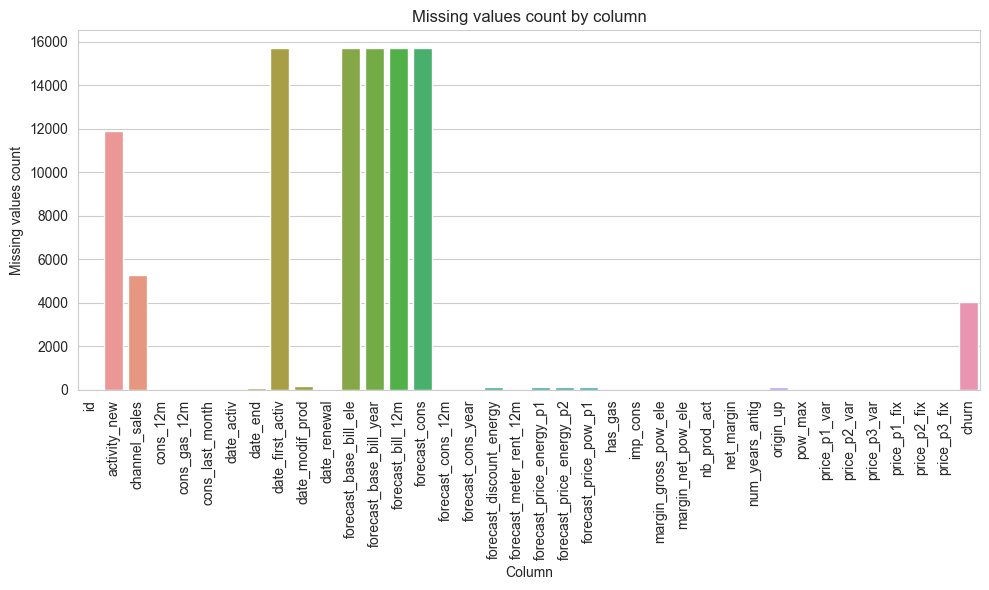

In [18]:
missing_values_count = df_main.isnull().sum()

missing_values_df = pd.DataFrame({'column': missing_values_count.index, 'count': missing_values_count.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='column', y='count', data=missing_values_df)
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Missing values count')
plt.title('Missing values count by column')
plt.tight_layout()
plt.show()

{ hypothesis } There are more than 15.000 missing values in some forecast and date columns. Our hypothesis is that these columns will not help the prediction and it will be very laborious to create something useful using these data. So, these columns will not be added in the final df.

In [19]:
df_main.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
count,2.012000e+04,2.012000e+04,2.012000e+04,20111,20039,4382,19915,20076,4385.000000,4385.000000,4385.000000,4385.000000,20120.000000,20120.000000,19970.000000,20120.000000,19970.000000,19970.000000,19970.000000,20120.000000,20120.000000,20105.000000,20105.000000,20120.00000,20102.000000,20120.000000,20116.000000,20118.000000,20118.000000,20118.000000,20118.000000,20118.000000,20118.000000,16096.000000
mean,1.949648e+05,3.196017e+04,1.953380e+04,2017-01-19 08:10:41.559345664,2022-07-28 10:14:19.803383296,2017-06-30 12:35:49.155636736,2018-12-20 02:53:36.590509568,2021-07-20 14:52:47.483562496,344.466267,344.466267,3907.823737,214.150812,2370.826669,1912.253529,1.007611,70.064085,0.135960,0.052889,43.543557,0.183748,196.822941,22.475752,21.353071,1.34826,217.304279,5.023658,20.578284,0.141025,0.054322,0.030692,43.335137,10.692625,6.454092,0.099093
min,-1.252760e+05,-4.275000e+03,-9.138600e+04,2006-07-25 00:00:00,2012-08-26 00:00:00,2007-01-10 00:00:00,2006-07-25 00:00:00,2019-06-26 00:00:00,-364.940000,-364.940000,-2503.480000,-2.090000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,0.000000,-9038.210000,-528.640000,-981.560000,1.00000,-4148.990000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.832750e+03,0.000000e+00,0.000000e+00,2016-01-12 00:00:00,2022-04-30 00:00:00,2016-08-12 00:00:00,2016-08-12 00:00:00,2021-04-19 00:00:00,0.000000,0.000000,1162.140000,0.000000,509.840000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,0.000000,11.970000,11.950000,1.00000,51.542500,4.000000,12.500000,0.123974,0.000000,0.000000,40.674580,0.000000,0.000000,0.000000
50%,1.533450e+04,0.000000e+00,9.060000e+02,2017-03-15 00:00:00,2022-07-31 00:00:00,2017-11-15 00:00:00,2019-05-07 00:00:00,2021-07-24 00:00:00,162.600000,162.600000,2220.850000,40.830000,1176.745000,378.500000,0.000000,19.430000,0.142881,0.086163,44.311378,0.000000,44.820000,21.090000,21.000000,1.00000,119.425000,5.000000,13.856000,0.147251,0.085884,0.000000,44.281745,0.000000,0.000000,0.000000
75%,5.035500e+04,0.000000e+00,4.119500e+03,2018-04-30 00:00:00,2022-11-01 00:00:00,2018-06-30 00:00:00,2021-05-24 00:00:00,2021-10-30 00:00:00,398.500000,398.500000,4273.450000,228.660000,2700.552500,2019.000000,0.000000,131.490000,0.146348,0.098837,44.311378,0.000000,220.850000,29.640000,29.500000,1.00000,276.965000,6.000000,19.800000,0.150354,0.102396,0.072778,44.370635,24.388455,16.248110,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,2020-09-01 00:00:00,2023-06-13 00:00:00,2020-09-01 00:00:00,2022-01-29 00:00:00,2022-01-28 00:00:00,19021.240000,19021.240000,81122.630000,18267.500000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,1.000000,18267.500000,500.320000,500.320000,32.00000,24570.650000,16.000000,500.000000,0.278759,0.196275,0.102951,59.444710,36.490692,16.846695,1.000000
std,6.754792e+05,1.782284e+05,8.087283e+04,NaN,NaN,NaN,NaN,NaN,724.065119,724.065119,5700.747714,542.506310,4047.481373,5231.517730,5.217714,78.219057,0.026286,0.048587,5.173667,0.387288,498.026444,23.853275,28.838847,1.45777,356.223220,1.678148,21.833836,0.024251,0.049823,0.036202,5.317825,12.821517,7.760806,0.298796


## Cleaning by column

### activity_new

In [20]:
df_main['activity_new'].describe()

count                                 8221
unique                                 444
top       apdekpcbwosbxepsfxclislboipuxpop
freq                                  1974
Name: activity_new, dtype: object

In [21]:
df_main['activity_new'].nunique()

444

In [22]:
df_main['activity_new'].isnull().sum()

11899

In [23]:
# As the 'activity_new' column is categorical, replacing null values with 'null' will allow a new category to be created
df_main['activity_new'].fillna('null', inplace=True)

In [24]:
# Creating new columns to pass a categorical feature to numeric
df_main['no_activity_new'] = 0
df_main['top1_activity_new'] = 0

# As the 'activity_new' column has multiple values, it will be summarized in just two columns, one with the highest quantity category and the other with null values.
df_main.loc[df_main['activity_new'] == 'null', 'no_activity_new'] = 1
df_main.loc[df_main['activity_new'] == 'apdekpcbwosbxepsfxclislboipuxpop', 'top1_activity_new'] = 1

In [25]:
df_main.head(2)

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,no_activity_new,top1_activity_new
0,ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,2017-09-06,2022-09-06,NaT,2021-08-27,2021-09-07,NaN,NaN,NaN,NaN,4001.08,3215,0.0,130.43,0.114603,0.098261,40.606701,0,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.0,0.123993,0.103568,0.073708,40.728885,24.43733,16.291555,NaN,0,0
1,9c341e73685fcff6e3527ebd51da3fe5,null,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,2016-12-13,2022-12-31,NaT,2016-12-13,2022-01-01,NaN,NaN,NaN,NaN,518.22,563,0.0,23.20,0.142174,0.000000,44.444710,0,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.0,0.146223,0.000000,0.000000,44.444710,0.00000,0.000000,NaN,1,0


In [26]:
# Adding these two features to the main df
df['no_activity_new'] = df_main['no_activity_new']
df['top1_activity_new'] = df_main['top1_activity_new']

In [27]:
df.head(2)

,no_activity_new,top1_activity_new
0,0,0
1,1,0


### channel_sales

Number of unique values: 7

What are the unique values: ['foosdfpfkusacimwkcsosbicdxkicaua' 'usilxuppasemubllopkaafesmlibmsdf' nan
 'lmkebamcaaclubfxadlmueccxoimlema' 'ewpakwlliwisiwduibdlfmalxowmwpci'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'fixdbufsefwooaasfcxdxadsiekoceaa']

Number of null values: 5274

Quantity per option: 
channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    9168
lmkebamcaaclubfxadlmueccxoimlema    2601
usilxuppasemubllopkaafesmlibmsdf    1836
ewpakwlliwisiwduibdlfmalxowmwpci    1218
sddiedcslfslkckwlfkdpoeeailfpeds      13
epumfxlbckeskwekxbiuasklxalciiuu       6
fixdbufsefwooaasfcxdxadsiekoceaa       4
Name: count, dtype: int64


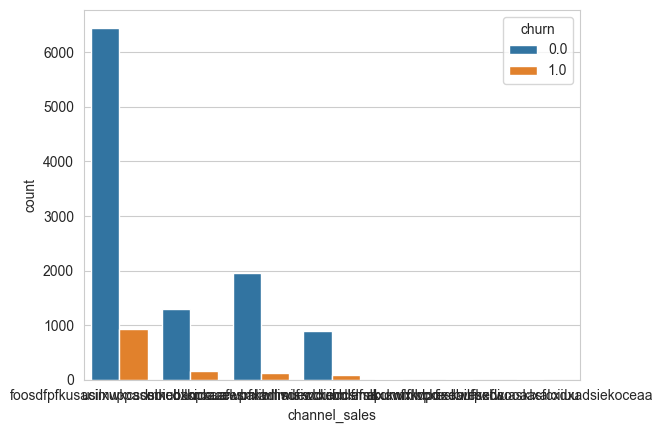

In [28]:
basic_analysis(df_main, 'channel_sales')

In [29]:
# Changing 'channel_sales' column values ​​for easier viewing
mapping = {
    'foosdfpfkusacimwkcsosbicdxkicaua': 'A',
    'lmkebamcaaclubfxadlmueccxoimlema': 'B',
    'usilxuppasemubllopkaafesmlibmsdf': 'C',
    'ewpakwlliwisiwduibdlfmalxowmwpci': 'D',
    'sddiedcslfslkckwlfkdpoeeailfpeds': 'E',
    'epumfxlbckeskwekxbiuasklxalciiuu': 'F',
    'fixdbufsefwooaasfcxdxadsiekoceaa': 'G'
}

df_main['channel_sales'] = df_main['channel_sales'].map(mapping)

In [30]:
# As the 'channel_sales' column is categorical, replacing null values with 'null' will allow a new category to be created
df_main['channel_sales'].fillna('null', inplace=True)

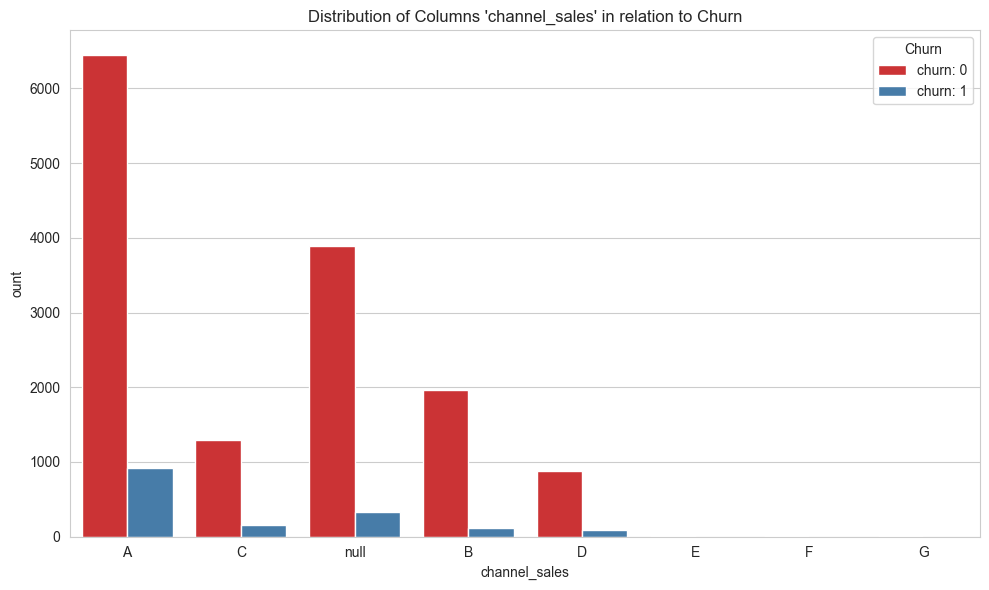

In [31]:
# Graph to compare the distribution of channel_sales categories and their distribution in relation to churns
colors = sns.color_palette('Set1')
plt.figure(figsize=(10, 6))
sns.countplot(x='channel_sales', hue='churn', data=df_main, palette=colors)
plt.title("Distribution of Columns 'channel_sales' in relation to Churn")
plt.xlabel("channel_sales")
plt.ylabel("ount")
plt.legend(title="Churn", labels=["churn: 0", "churn: 1"])
plt.tight_layout()
plt.show()

In [32]:
# Using .get_dummies to create new numeric features based on the categorical one
channel_sales = pd.get_dummies(df_main['channel_sales'], prefix = 'channel_sales').astype(int)

In [33]:
channel_sales.head()

,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [34]:
# Adding 'channel_sales' columns to main df
df = pd.concat([df, channel_sales], axis=1)

In [35]:
df.head(2)

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null
0,0,0,1,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0


### cons_12m

In [36]:
df_main['cons_12m'].nunique()

14260

In [37]:
df_main['cons_12m'].describe().round(2)

count       20120.00
mean       194964.85
std        675479.22
min       -125276.00
25%          5832.75
50%         15334.50
75%         50355.00
max      16097108.00
Name: cons_12m, dtype: float64

In [38]:
df_main['cons_12m'].isnull().sum()

0

In [39]:
# Identified negative values ​​so they can be handled correctly
negative_cons_12m = df_main[df_main['cons_12m'] < 0]

In [40]:
negative_cons_12m.shape

(37, 40)

{ hypothesis } There are not so many negative values ​​in the column, but they are a problem since negative consumption is not consistent with reality. The approach we will use to handle this column will be to replace these negative values ​​with values ​​closer to the real one.  
To do this, we will look for columns with greater correlation with 'cons_12m' and the average will be made with more specific groups, under the assumption that this will generate values ​​that are more in line with reality.  
The way we chose to find the best features to create these specific groups was through correlation matrices that show relevant information about how the columns are related.

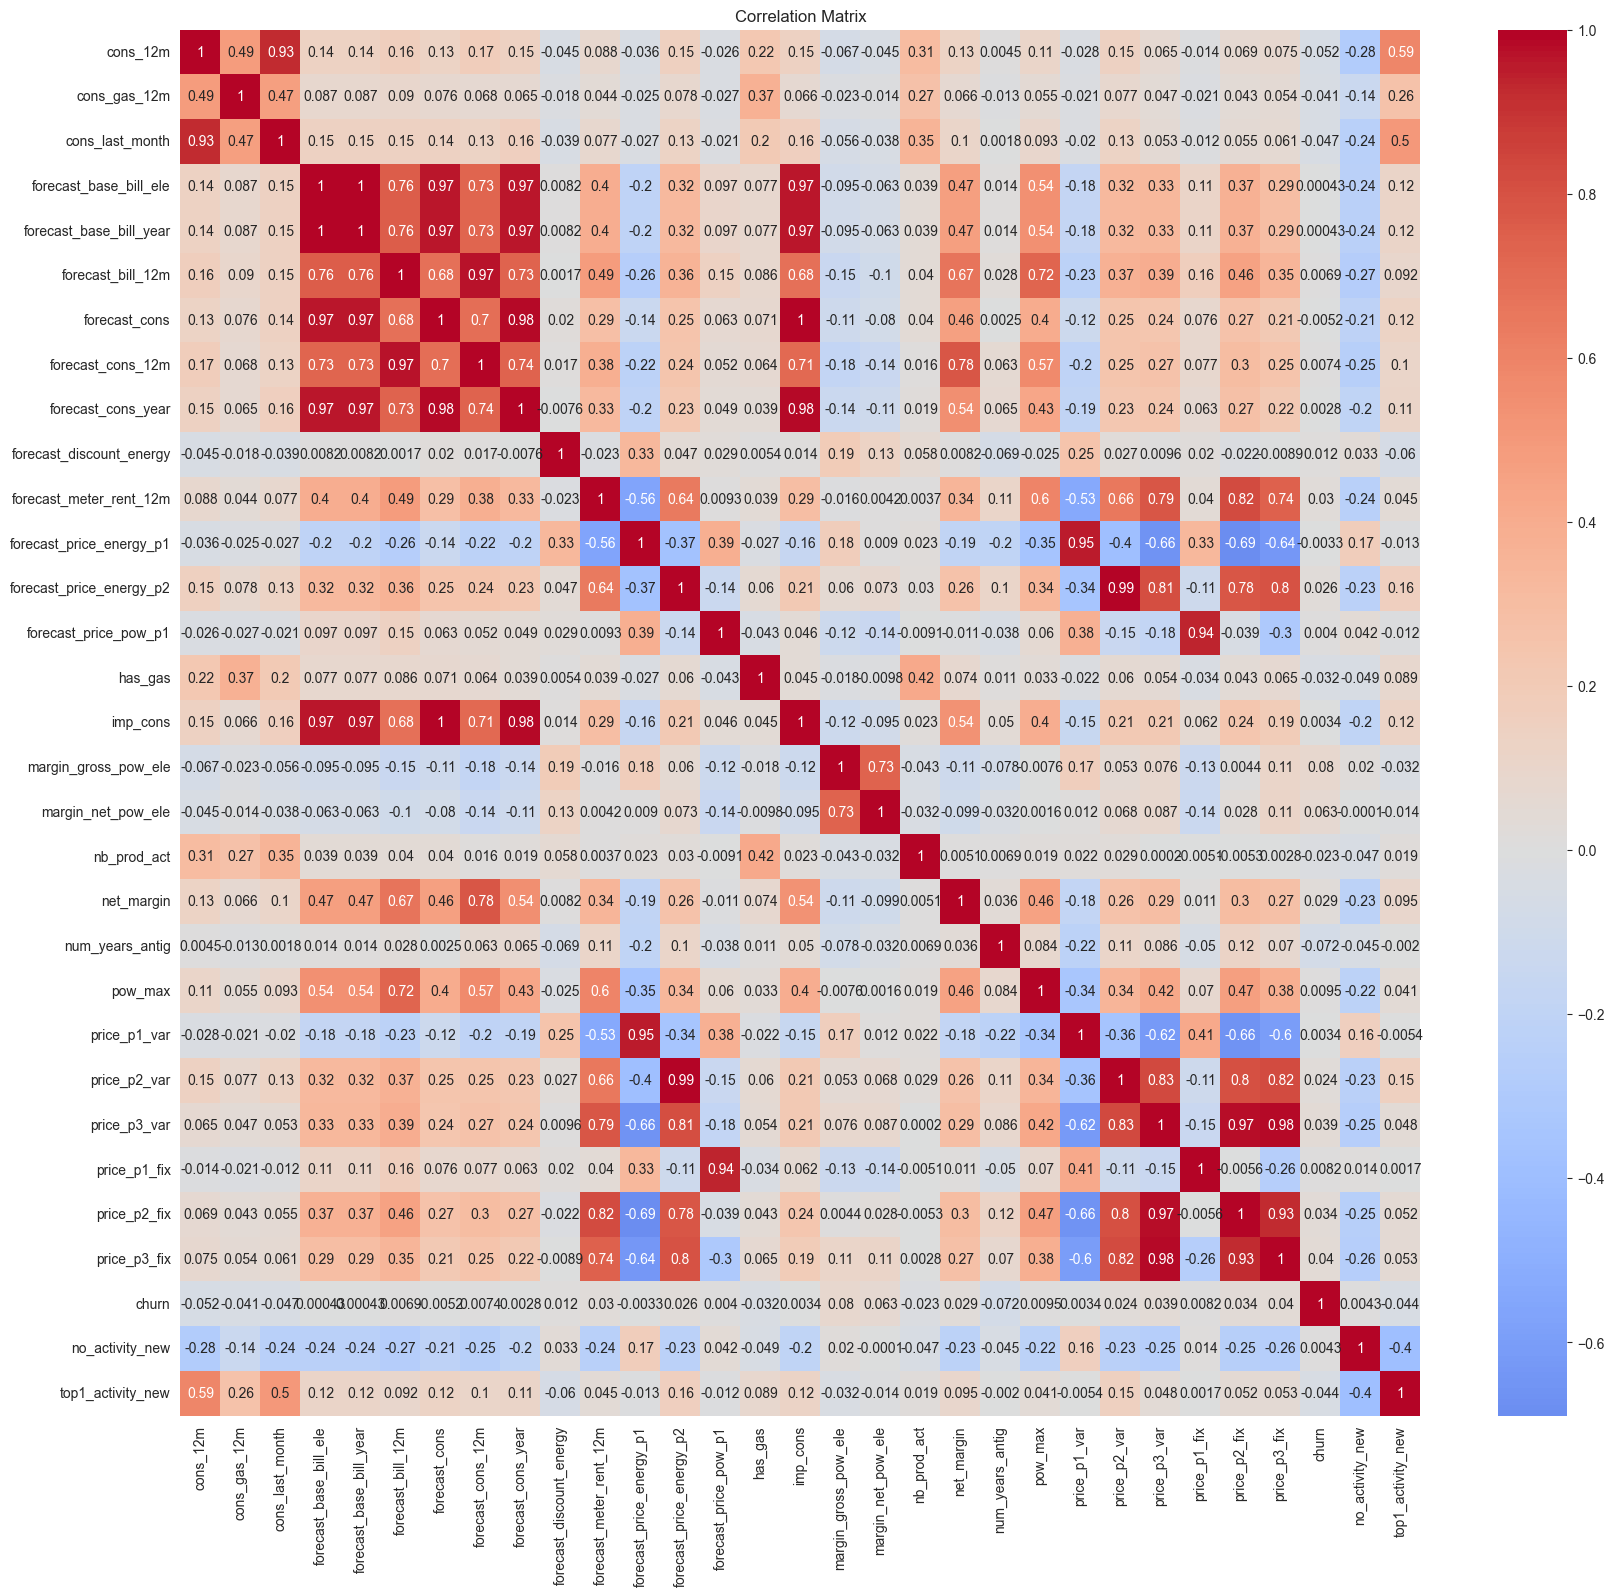

In [41]:
# Creating a correlation matrix to visualize how features interact with each other
correlation_matrix = df_main.select_dtypes(include=[float, int]).corr()

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

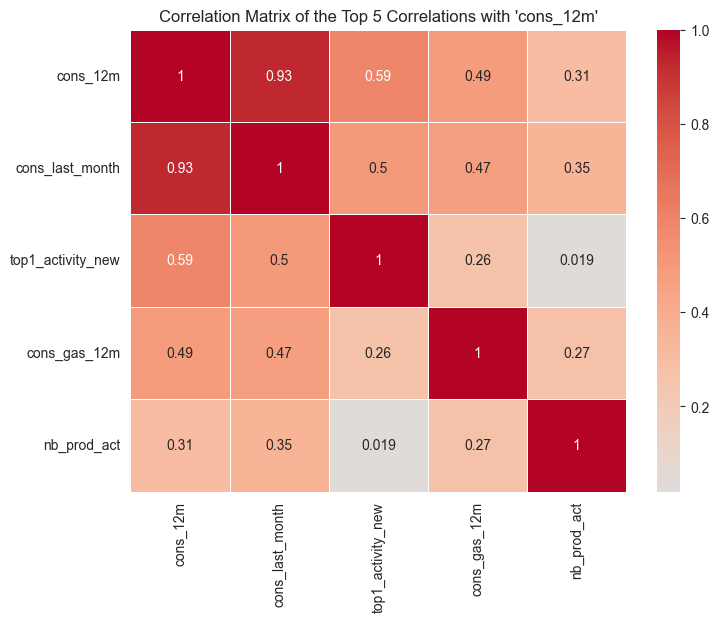

In [42]:
# Finding the highest correlations with column 'cons_12m'
correlations_cons_12m = df_main.select_dtypes(include=[float, int]).corr()['cons_12m'].sort_values(ascending=False)

# Taking only the top 5
top_correlations = correlations_cons_12m.head()

# Creating a subset to plot the features most correlated with column 'cons_12m'
correlation_subset = df_main[top_correlations.index]

correlation_matrix = correlation_subset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix of the Top 5 Correlations with 'cons_12m'")
plt.show()

In [43]:
# Features chosen to make the selection of values
# channel_sales -> to create more groupings
# top1_activity_new -> high correlation
# nb_prod_act -> considerable correlation and possibility of larger grouping
df_main.groupby(['channel_sales', 'top1_activity_new', 'nb_prod_act'])['cons_12m'].mean().round(2)

channel_sales  top1_activity_new  nb_prod_act
A              0                  1                42318.84
                                  2                51152.07
                                  3                65681.57
                                  4                34327.04
                                  5                34867.82
                                  6                10707.00
                                  8               790822.00
                                  31              316796.00
               1                  1              1054782.68
                                  2              2126684.18
                                  3              2081429.00
                                  5              2098267.25
                                  6               913608.50
                                  32             5322441.00
B              0                  1               126313.07
                                  2               2650

In [44]:
# Filling negative values ​​with means
grouped_means = df_main.groupby(['channel_sales', 'top1_activity_new', 'nb_prod_act'])['cons_12m'].mean().round(2)

mean_dict = grouped_means.to_dict()

for index, row in df_main.iterrows():
    if row['cons_12m'] < 0:
        key = (row['channel_sales'], row['top1_activity_new'], row['nb_prod_act'])
        if key in mean_dict:
            df_main.at[index, 'cons_12m'] = mean_dict[key]

In [45]:
df_main['cons_12m'].describe().round(2)

count       20120.00
mean       195175.74
std        675473.99
min             0.00
25%          5881.75
50%         15441.50
75%         50461.75
max      16097108.00
Name: cons_12m, dtype: float64

In [46]:
df['cons_12m'] = df_main['cons_12m']

In [47]:
df.head(2)

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m
0,0,0,1,0,0,0,0,0,0,0,42132.0
1,1,0,1,0,0,0,0,0,0,0,3537.0


### cons_gas_12m

In [48]:
df_main['cons_gas_12m'].nunique()

2812

In [49]:
df_main['cons_gas_12m'].isnull().sum()

0

In [50]:
df_main['cons_gas_12m'].describe().round(2)

count      20120.00
mean       31960.17
std       178228.42
min        -4275.00
25%            0.00
50%            0.00
75%            0.00
max      4188440.00
Name: cons_gas_12m, dtype: float64

In [51]:
# Identified negative values ​​so they can be handled correctly
negative_cons_gas_12m = df_main[df_main['cons_gas_12m'] < 0]

In [52]:
# As there are few negative values ​​for this column, the grouping will only be done between the churn column
df_main.groupby(['churn'])['cons_gas_12m'].mean().round(2)

churn
0.0    34319.31
1.0    10022.21
Name: cons_gas_12m, dtype: float64

In [53]:
for i in df_main.index:
    if df_main['cons_gas_12m'][i] < 0:
        if df_main['has_gas'][i] == 0:
            df_main['cons_gas_12m'][i] = 0
        elif df_main['churn'][i] == 0:
            df_main['cons_gas_12m'][i] = 34319.31
        elif df_main['churn'][i] == 1:
            df_main['cons_gas_12m'][i] = 10022.21
        else:
            df_main['cons_gas_12m'][i] = 10022.21
    else:
        continue

C:\Users\Inteli\AppData\Local\Temp\ipykernel_1384\2857263647.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['cons_gas_12m'][i] = 10022.21


In [54]:
df_main['cons_gas_12m'].describe().round(2)

count      20120.00
mean       31968.21
std       178227.65
min            0.00
25%            0.00
50%            0.00
75%            0.00
max      4188440.00
Name: cons_gas_12m, dtype: float64

In [55]:
df['cons_gas_12m'] = df_main['cons_gas_12m']

In [56]:
df.head(2)

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m,cons_gas_12m
0,0,0,1,0,0,0,0,0,0,0,42132.0,0.0
1,1,0,1,0,0,0,0,0,0,0,3537.0,0.0


### cons_last_month

In [57]:
df_main['cons_last_month'].isnull().sum()

0

In [58]:
df_main['cons_last_month'].describe().round(2)

count      20120.00
mean       19533.80
std        80872.83
min       -91386.00
25%            0.00
50%          906.00
75%         4119.50
max      4538720.00
Name: cons_last_month, dtype: float64

In [59]:
negative_cons_last_month = df_main[df_main['cons_last_month'] < 0]

In [60]:
negative_cons_last_month.shape

(54, 40)

In [61]:
grouped_means_lm = df_main.groupby(['channel_sales', 'top1_activity_new', 'nb_prod_act'])['cons_last_month'].mean().round(2)

mean_dict_lm = grouped_means.to_dict()

for index, row in df_main.iterrows():
    if row['cons_last_month'] < 0:
        key = (row['channel_sales'], row['top1_activity_new'], row['nb_prod_act'])
        if key in mean_dict:
            df_main.at[index, 'cons_last_month'] = mean_dict[key]

In [62]:
df_main['cons_last_month'].describe().round(2)

count      20120.00
mean       21530.92
std       106087.03
min            0.00
25%            0.00
50%          925.00
75%         4169.50
max      4538720.00
Name: cons_last_month, dtype: float64

In [63]:
df['cons_last_month'] = df_main['cons_last_month'].round(2)

In [64]:
df.head(2)

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m,cons_gas_12m,cons_last_month
0,0,0,1,0,0,0,0,0,0,0,42132.0,0.0,3215.0
1,1,0,1,0,0,0,0,0,0,0,3537.0,0.0,563.0


### date_activ

### date_end

### date_first_activ

### date_modif_prod

### date_renewall

### Unused columns (1)

We don't consider the following forecast columns to be relevant at the moment, so we won't clean data now. The columns are: 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2' and 'forecast_price_pow_p1'.

### Unused columns (2)

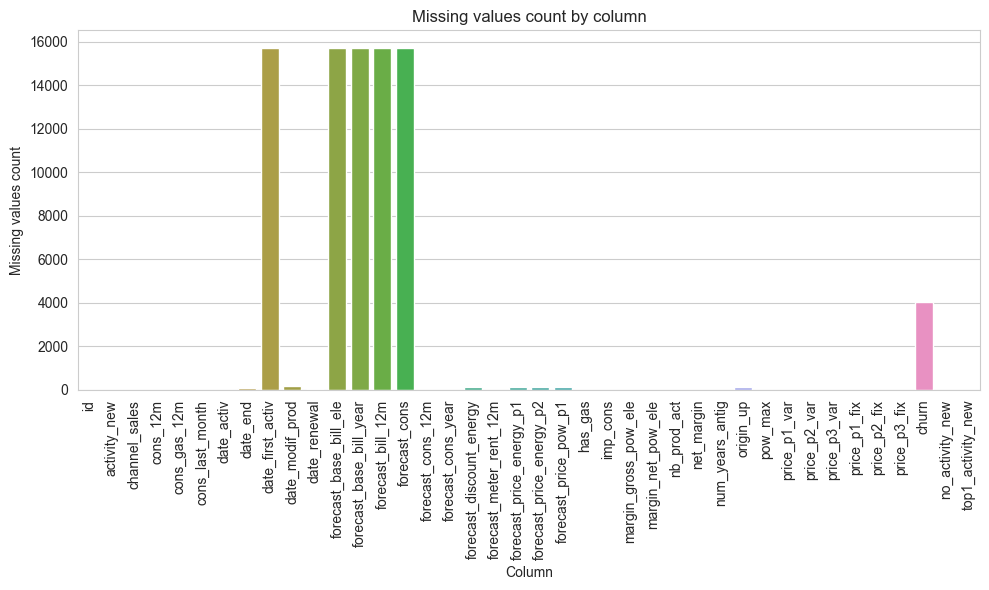

In [65]:
missing_values_count = df_main.isnull().sum()

missing_values_df = pd.DataFrame({'column': missing_values_count.index, 'count': missing_values_count.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='column', y='count', data=missing_values_df)
plt.xticks(rotation=90)
plt.xlabel('Column')
plt.ylabel('Missing values count')
plt.title('Missing values count by column')
plt.tight_layout()
plt.show()

There are many null data in some of those columns like 'forecast_bas_bill_elle', 'forecast_base_bill_year', 'forecast_base_12m', 'forecast_cons', and we don't consider this data relevant to our model. So, we are not gonna clean this data now.

### forecast_base_bill_ele

In [66]:
df_main['forecast_base_bill_ele'].nunique()

2540

In [67]:
df_main['forecast_base_bill_ele'].describe().round()

count     4385.0
mean       344.0
std        724.0
min       -365.0
25%          0.0
50%        163.0
75%        398.0
max      19021.0
Name: forecast_base_bill_ele, dtype: float64

In [68]:
# Identified negative values ​​so they can be handled correctly
negative_forecast_base_bill_ele = df_main[df_main['forecast_base_bill_ele'] < 0]

In [69]:
negative_forecast_base_bill_ele.shape

(1, 40)

In [70]:
zero_forecast_base_bill_ele = df_main[df_main['forecast_base_bill_ele'] == 0]

In [71]:
zero_forecast_base_bill_ele.shape

(1804, 40)

In [72]:
df_main['forecast_base_bill_ele'].isnull().sum()

15735

There are many null data in this column and we don't consider this data relevant to our model. So, we are not gonna clean this data now.

### forecast_cons_12m

In [73]:
df_main['forecast_cons_12m'].nunique()

19185

In [74]:
df_main['forecast_cons_12m'].describe().round()

count     20120.0
mean       2371.0
std        4047.0
min      -16689.0
25%         510.0
50%        1177.0
75%        2701.0
max      103802.0
Name: forecast_cons_12m, dtype: float64

In [75]:
df_main['forecast_cons_12m'].isnull().sum()

0

In [76]:
negative_forecast_cons_12m = df_main[df_main['forecast_cons_12m'] < 0]

In [77]:
negative_forecast_cons_12m.shape

(52, 40)

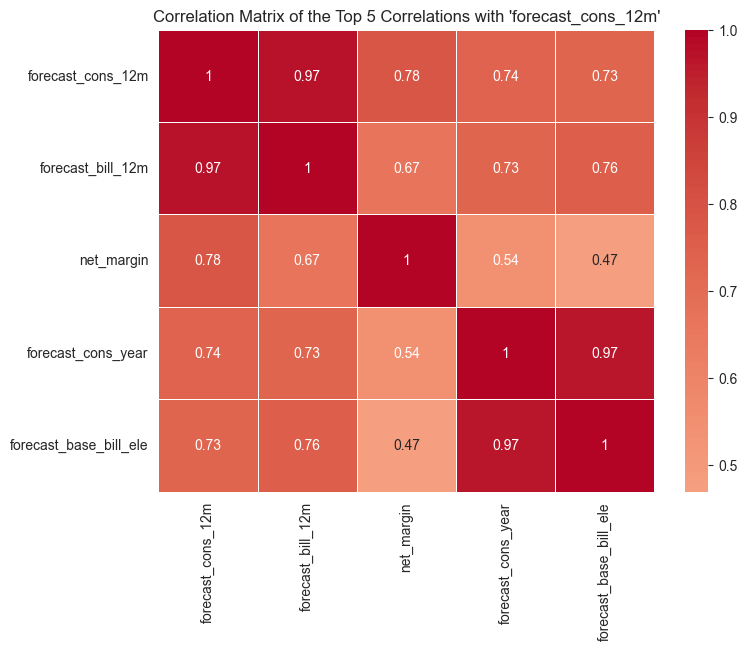

In [78]:
# Finding the highest correlations with column 'forecast_cons_12m'
correlations_forecast_cons_12m = df_main.select_dtypes(include=[float, int]).corr()['forecast_cons_12m'].sort_values(ascending=False)

# Taking only the top 5
top_correlations = correlations_forecast_cons_12m.head()

# Creating a subset to plot the features most correlated with column 'forecast_cons_12m'
correlation_subset = df_main[top_correlations.index]

correlation_matrix = correlation_subset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix of the Top 5 Correlations with 'forecast_cons_12m'")
plt.show()

In [79]:
# None feature with categoric values has a high correlation with 'forecast_cons_12m', so the mean will of 'forecast_cons_12m' be used to fill the negative values
df_main['forecast_cons_12m'].mean().round()

for i in df_main.index: 
    if df_main['forecast_cons_12m'][i] < 0:
        df_main['forecast_cons_12m'][i] = 2370.0
    else:
        continue

C:\Users\Inteli\AppData\Local\Temp\ipykernel_1384\3231107404.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['forecast_cons_12m'][i] = 2370.0
C:\Users\Inteli\AppData\Local\Temp\ipykernel_1384\3231107404.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['forecast_cons_12m'][i] = 2370.0
C:\Users\Inteli\AppData\Local\Temp\ipykernel_1384\3231107404.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['forecast_

In [80]:
df_main['forecast_cons_12m'].describe().round(2)

count     20120.00
mean       2381.86
std        4037.98
min           0.00
25%         514.30
50%        1184.81
75%        2700.55
max      103801.93
Name: forecast_cons_12m, dtype: float64

In [81]:
df['forecast_cons_12m'] = df_main['forecast_cons_12m']

In [82]:
df.head()

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m
0,0,0,1,0,0,0,0,0,0,0,42132.0,0.0,3215.0,4001.08
1,1,0,1,0,0,0,0,0,0,0,3537.0,0.0,563.0,518.22
2,1,0,1,0,0,0,0,0,0,0,6543.0,0.0,399.0,639.65
3,0,1,1,0,0,0,0,0,0,0,186838.0,0.0,12091.0,2634.23
4,1,0,0,0,1,0,0,0,0,0,19051.0,0.0,0.0,2801.47


### forecast_cons_year

In [83]:
df_main['forecast_cons_year'].nunique()

5549

In [84]:
df_main['forecast_cons_year'].describe().round(2)

count     20120.00
mean       1912.25
std        5231.52
min      -85627.00
25%           0.00
50%         378.50
75%        2019.00
max      175375.00
Name: forecast_cons_year, dtype: float64

In [85]:
df_main['forecast_cons_year'].isnull().sum()

0

In [86]:
# Identified negative values ​​so they can be handled correctly
negative_forecast_cons_year = df_main[df_main['forecast_cons_year'] < 0]

In [87]:
negative_forecast_cons_year.shape

(32, 40)

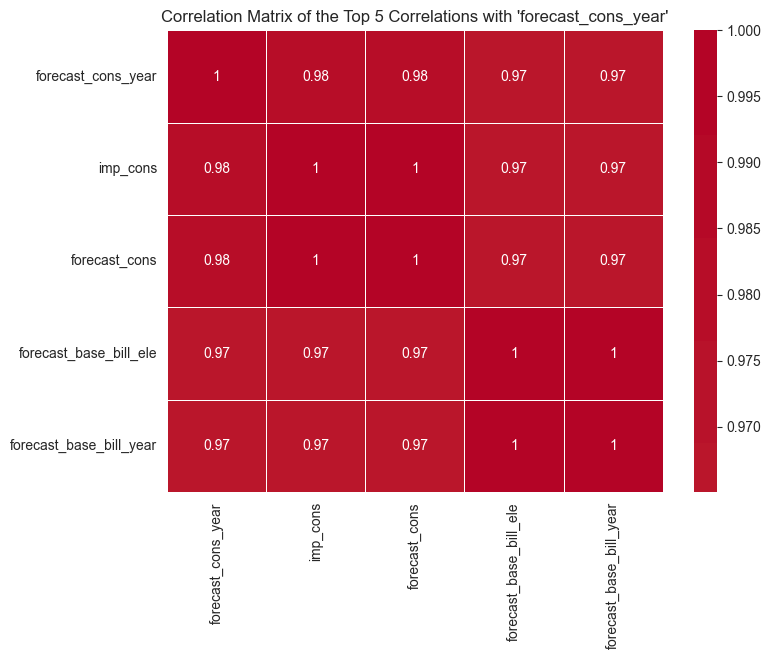

In [88]:
# Finding the highest correlations with column 'forecast_cons_year'
correlations_forecast_cons_year = df_main.select_dtypes(include=[float, int]).corr()['forecast_cons_year'].sort_values(ascending=False)

# Taking only the top 5
top_correlations = correlations_forecast_cons_year.head()

# Creating a subset to plot the features most correlated with column 'forecast_cons_year'
correlation_subset = df_main[top_correlations.index]

correlation_matrix = correlation_subset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix of the Top 5 Correlations with 'forecast_cons_year'")
plt.show()

In [89]:
# None feature with categoric values has a high correlation with 'forecast_cons_year', so the mean will of 'forecast_cons_year' be used to fill the negative values
df_main['forecast_cons_year'].mean().round()

for i in df_main.index: 
    if df_main['forecast_cons_year'][i] < 0:
        df_main['forecast_cons_year'][i] = 1907.83
    else:
        continue

C:\Users\Inteli\AppData\Local\Temp\ipykernel_1384\1204757424.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['forecast_cons_year'][i] = 1907.83


In [90]:
df_main['forecast_cons_year'].describe().round(2)

count     20120.00
mean       1926.07
std        5185.04
min           0.00
25%           0.00
50%         385.00
75%        2019.00
max      175375.00
Name: forecast_cons_year, dtype: float64

In [91]:
df['forecast_cons_year'] = df_main['forecast_cons_year']

In [92]:
df.head()

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year
0,0,0,1,0,0,0,0,0,0,0,42132.0,0.0,3215.0,4001.08,3215.0
1,1,0,1,0,0,0,0,0,0,0,3537.0,0.0,563.0,518.22,563.0
2,1,0,1,0,0,0,0,0,0,0,6543.0,0.0,399.0,639.65,399.0
3,0,1,1,0,0,0,0,0,0,0,186838.0,0.0,12091.0,2634.23,738.0
4,1,0,0,0,1,0,0,0,0,0,19051.0,0.0,0.0,2801.47,0.0


### has_gas

Number of unique values: 2

What are the unique values: [0 1]

Number of null values: 0

Quantity per option: 
has_gas
0    16423
1     3697
Name: count, dtype: int64


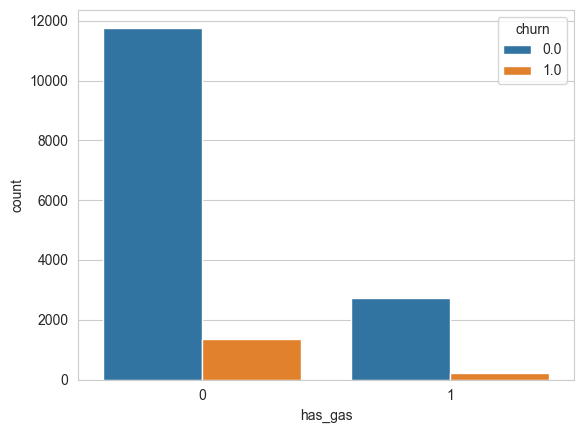

In [93]:
basic_analysis(df_main, 'has_gas')

In [94]:
df['has_gas'] = df_main['has_gas']

In [95]:
df.head(2)

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,has_gas
0,0,0,1,0,0,0,0,0,0,0,42132.0,0.0,3215.0,4001.08,3215.0,0
1,1,0,1,0,0,0,0,0,0,0,3537.0,0.0,563.0,518.22,563.0,0


### imp_cons

In [96]:
df_main['imp_cons'].nunique()

10690

In [97]:
df_main['imp_cons'].describe()

count    20120.000000
mean       196.822941
std        498.026444
min      -9038.210000
25%          0.000000
50%         44.820000
75%        220.850000
max      18267.500000
Name: imp_cons, dtype: float64

In [98]:
negative_imp_cons = df_main[df_main['imp_cons'] < 0]
zero_imp_cons = df_main[df_main['imp_cons'] == 0]

In [99]:
zero_imp_cons.shape

(8188, 40)

In [100]:
negative_imp_cons.shape

(34, 40)

In [101]:
grouped_means = df_main.groupby(['no_activity_new', 'top1_activity_new', 'churn'])['imp_cons'].mean().round(2)

mean_dict = grouped_means.to_dict()

for index, row in df_main.iterrows():
    if row['imp_cons'] < 0:
        key = (row['no_activity_new'], row['top1_activity_new'], row['churn'])
        if key in mean_dict:
            df_main.at[index, 'imp_cons'] = mean_dict[key]

In [102]:
for i in df_main.index:
    if df_main['imp_cons'][i] < 0:
        df_main['imp_cons'][i] = df_main['imp_cons'].mean().round(2)

C:\Users\Inteli\AppData\Local\Temp\ipykernel_1384\3539277080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['imp_cons'][i] = df_main['imp_cons'].mean().round(2)
C:\Users\Inteli\AppData\Local\Temp\ipykernel_1384\3539277080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['imp_cons'][i] = df_main['imp_cons'].mean().round(2)
C:\Users\Inteli\AppData\Local\Temp\ipykernel_1384\3539277080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [103]:
df_main['imp_cons'].describe()

count    20120.000000
mean       198.336210
std        492.477833
min          0.000000
25%          0.000000
50%         45.785000
75%        221.245000
max      18267.500000
Name: imp_cons, dtype: float64

In [104]:
df['imp_cons'] = df_main['imp_cons']

In [105]:
df.head(2)

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,has_gas,imp_cons
0,0,0,1,0,0,0,0,0,0,0,42132.0,0.0,3215.0,4001.08,3215.0,0,296.90
1,1,0,1,0,0,0,0,0,0,0,3537.0,0.0,563.0,518.22,563.0,0,80.66


### margin_gross_pow_ele

### margin_net_pow_ele

### nb_prod_act

In [106]:
df_main['nb_prod_act'].isnull().sum()

0

In [107]:
df_main['nb_prod_act'].describe()

count    20120.00000
mean         1.34826
std          1.45777
min          1.00000
25%          1.00000
50%          1.00000
75%          1.00000
max         32.00000
Name: nb_prod_act, dtype: float64

Number of unique values: 11

What are the unique values: [ 1  4  2  3  5 32  9  8 31  6 10]

Number of null values: 0

Quantity per option: 
nb_prod_act
1     15697
2      3396
3       682
4       219
5        49
32       31
9        16
6        12
8        11
31        5
10        2
Name: count, dtype: int64


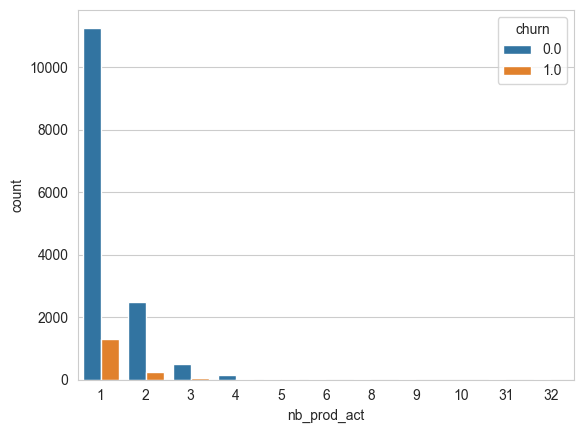

In [108]:
basic_analysis(df_main, 'nb_prod_act')

In [109]:
df['nb_prod_act'] = df_main['nb_prod_act']

In [110]:
df.head(2)

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,has_gas,imp_cons,nb_prod_act
0,0,0,1,0,0,0,0,0,0,0,42132.0,0.0,3215.0,4001.08,3215.0,0,296.90,1
1,1,0,1,0,0,0,0,0,0,0,3537.0,0.0,563.0,518.22,563.0,0,80.66,1


### net_margin

In [111]:
df_main['net_margin'].isnull().sum()

18

In [112]:
df_main['net_margin'].describe()

count    20102.000000
mean       217.304279
std        356.223220
min      -4148.990000
25%         51.542500
50%        119.425000
75%        276.965000
max      24570.650000
Name: net_margin, dtype: float64

In [113]:
# Is this negative net margin a loss?
negative_net_margin = df_main[df_main['net_margin'] < 0]

In [114]:
negative_net_margin.shape

(131, 40)

### num_years_antig

Number of unique values: 15

What are the unique values: [ 4  5  3  6  7 11  8  2 10  9 13 12 16 15  1]

Number of null values: 0

Quantity per option: 
num_years_antig
6     6335
4     5425
3     3490
5     3076
7      794
11     303
8      236
12     157
10     142
9      128
13      17
2       14
16       1
15       1
1        1
Name: count, dtype: int64


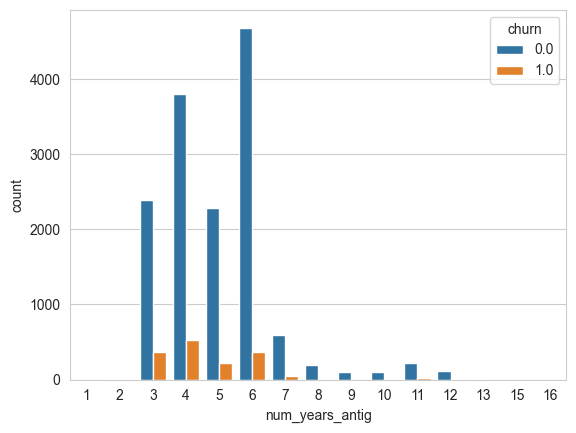

In [115]:
basic_analysis(df_main, 'num_years_antig')

In [116]:
df['num_years_antig'] = df_main['num_years_antig']

In [117]:
df.head(2)

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,has_gas,imp_cons,nb_prod_act,num_years_antig
0,0,0,1,0,0,0,0,0,0,0,42132.0,0.0,3215.0,4001.08,3215.0,0,296.90,1,4
1,1,0,1,0,0,0,0,0,0,0,3537.0,0.0,563.0,518.22,563.0,0,80.66,1,5


### origin_up

Number of unique values: 6

What are the unique values: ['lxidpiddsbxsbosboudacockeimpuepw' 'ldkssxwpmemidmecebumciepifcamkci'
 'kamkkxfxxuwbdslkwifmmcsiusiuosws' nan 'aabpopmuoobccoxasfsksebxoxffdcxs'
 'usapbepcfoloekilkwsdiboslwaxobdp' 'ewxeelcelemmiwuafmddpobolfuxioce']

Number of null values: 114

Quantity per option: 
origin_up
lxidpiddsbxsbosboudacockeimpuepw    9725
kamkkxfxxuwbdslkwifmmcsiusiuosws    5681
ldkssxwpmemidmecebumciepifcamkci    4595
aabpopmuoobccoxasfsksebxoxffdcxs       2
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64


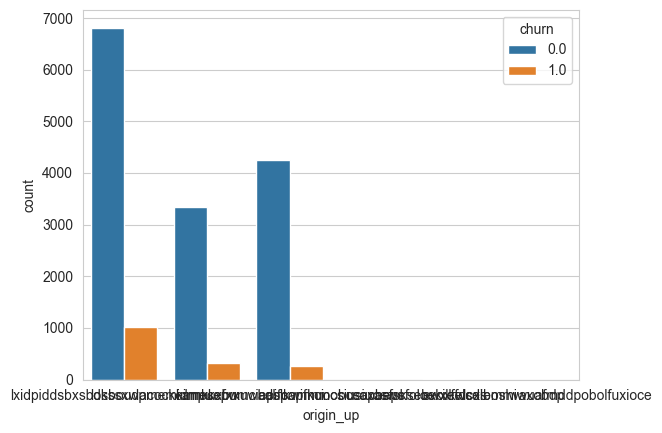

In [118]:
basic_analysis(df_main, 'origin_up')

In [119]:
# Changing 'origin_up' column values ​​for easier viewing
mapping = {
    'lxidpiddsbxsbosboudacockeimpuepw': 'A',
    'kamkkxfxxuwbdslkwifmmcsiusiuosws': 'B',
    'ldkssxwpmemidmecebumciepifcamkci': 'C',
    'aabpopmuoobccoxasfsksebxoxffdcxs': 'D',
    'usapbepcfoloekilkwsdiboslwaxobdp': 'E',
    'ewxeelcelemmiwuafmddpobolfuxioce': 'F'
}

df_main['origin_up'] = df_main['origin_up'].map(mapping)

In [120]:
# As the 'origin_up' column is categorical, replacing null values with 'null' will allow a new category to be created
df_main['origin_up'].fillna('null', inplace=True)

Number of unique values: 7

What are the unique values: ['A' 'C' 'B' 'null' 'D' 'E' 'F']

Number of null values: 0

Quantity per option: 
origin_up
A       9725
B       5681
C       4595
null     114
D          2
E          2
F          1
Name: count, dtype: int64


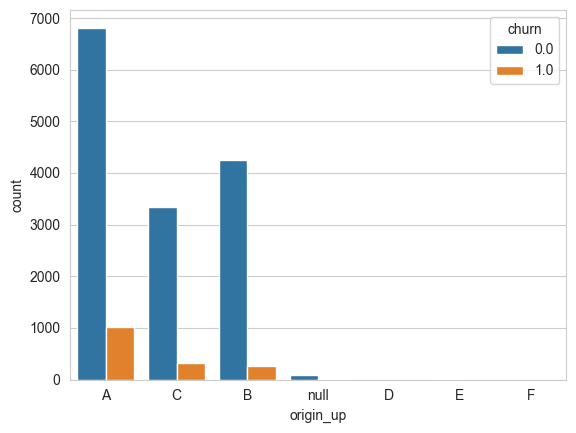

In [121]:
basic_analysis(df_main, 'origin_up')

In [122]:
origin_up = pd.get_dummies(df_main['origin_up'], prefix = 'origin_up').astype(int)

In [123]:
df = pd.concat([df, origin_up], axis=1)

In [124]:
df.head(2)

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,has_gas,imp_cons,nb_prod_act,num_years_antig,origin_up_A,origin_up_B,origin_up_C,origin_up_D,origin_up_E,origin_up_F,origin_up_null
0,0,0,1,0,0,0,0,0,0,0,42132.0,0.0,3215.0,4001.08,3215.0,0,296.90,1,4,1,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,3537.0,0.0,563.0,518.22,563.0,0,80.66,1,5,1,0,0,0,0,0,0


### pow_max

In [125]:
df_main['pow_max'].isnull().sum()

4

In [126]:
df_main['pow_max'].describe()

count    20116.000000
mean        20.578284
std         21.833836
min          0.000000
25%         12.500000
50%         13.856000
75%         19.800000
max        500.000000
Name: pow_max, dtype: float64

In [127]:
df_main['pow_max'].mean()

20.578283605090476

In [128]:
df_main['pow_max'].fillna(20.57, inplace=True)

In [129]:
df_main['pow_max'].isnull().sum()

0

In [130]:
df['pow_max'] = df_main['pow_max'].round(2)

In [131]:
df.head(2)

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,has_gas,imp_cons,nb_prod_act,num_years_antig,origin_up_A,origin_up_B,origin_up_C,origin_up_D,origin_up_E,origin_up_F,origin_up_null,pow_max
0,0,0,1,0,0,0,0,0,0,0,42132.0,0.0,3215.0,4001.08,3215.0,0,296.90,1,4,1,0,0,0,0,0,0,20.0
1,1,0,1,0,0,0,0,0,0,0,3537.0,0.0,563.0,518.22,563.0,0,80.66,1,5,1,0,0,0,0,0,0,15.0


### prices columns

In [132]:
df_main[['price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix']].isnull().sum()

price_p1_var    2
price_p2_var    2
price_p3_var    2
price_p1_fix    2
price_p2_fix    2
price_p3_fix    2
dtype: int64

In [133]:
df_main[['price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix']].mean()

price_p1_var     0.141025
price_p2_var     0.054322
price_p3_var     0.030692
price_p1_fix    43.335137
price_p2_fix    10.692625
price_p3_fix     6.454092
dtype: float64

In [134]:
columns_price = ['price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix']

means = df_main[columns_price].mean()

df_main[columns_price] = df_main[columns_price].fillna(means)

In [135]:
df_main[['price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix']].isnull().sum()

price_p1_var    0
price_p2_var    0
price_p3_var    0
price_p1_fix    0
price_p2_fix    0
price_p3_fix    0
dtype: int64

In [136]:
df[columns_price] = df_main[columns_price]

In [137]:
df.head(2)

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,has_gas,imp_cons,nb_prod_act,num_years_antig,origin_up_A,origin_up_B,origin_up_C,origin_up_D,origin_up_E,origin_up_F,origin_up_null,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0,0,1,0,0,0,0,0,0,0,42132.0,0.0,3215.0,4001.08,3215.0,0,296.90,1,4,1,0,0,0,0,0,0,20.0,0.123993,0.103568,0.073708,40.728885,24.43733,16.291555
1,1,0,1,0,0,0,0,0,0,0,3537.0,0.0,563.0,518.22,563.0,0,80.66,1,5,1,0,0,0,0,0,0,15.0,0.146223,0.000000,0.000000,44.444710,0.00000,0.000000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20120 entries, 0 to 20119
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   no_activity_new     20120 non-null  int64  
 1   top1_activity_new   20120 non-null  int64  
 2   channel_sales_A     20120 non-null  int32  
 3   channel_sales_B     20120 non-null  int32  
 4   channel_sales_C     20120 non-null  int32  
 5   channel_sales_D     20120 non-null  int32  
 6   channel_sales_E     20120 non-null  int32  
 7   channel_sales_F     20120 non-null  int32  
 8   channel_sales_G     20120 non-null  int32  
 9   channel_sales_null  20120 non-null  int32  
 10  cons_12m            20120 non-null  float64
 11  cons_gas_12m        20120 non-null  float64
 12  cons_last_month     20120 non-null  float64
 13  forecast_cons_12m   20120 non-null  float64
 14  forecast_cons_year  20120 non-null  float64
 15  has_gas             20120 non-null  int64  
 16  imp_

# Descriptive analysis

In [139]:
# Add column 'churn'
df['churn'] = df_main['churn']

In [140]:
# Descriptive Analisys from relevant columns.

descripte_analisys(df, ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_year', 'imp_cons', 'pow_max', 'price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix'])


empty "churn" parameter


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_year,imp_cons,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,20120.00,20120.00,20120.00,20120.00,20120.00,20120.00,20120.00,20120.00,20120.00,20120.00,20120.00,20120.00
mean,195175.74,31968.21,21530.92,1926.07,198.34,20.58,0.14,0.05,0.03,43.34,10.69,6.45
std,675473.99,178227.65,106087.03,5185.04,492.48,21.83,0.02,0.05,0.04,5.32,12.82,7.76
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,5881.75,0.00,0.00,0.00,0.00,12.50,0.12,0.00,0.00,40.67,0.00,0.00
50%,15441.50,0.00,925.00,385.00,45.78,13.86,0.15,0.09,0.00,44.28,0.00,0.00
75%,50461.75,0.00,4169.50,2019.00,221.24,19.80,0.15,0.10,0.07,44.37,24.39,16.25
max,16097108.00,4188440.00,4538720.00,175375.00,18267.50,500.00,0.28,0.20,0.10,59.44,36.49,16.85


In [141]:
# print 'df_normalized' have numeric columns normalized 
normalize_columns(df, ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_year', 'forecast_cons_12m', 'imp_cons', 'pow_max', 'price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix'])

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,has_gas,imp_cons,nb_prod_act,num_years_antig,origin_up_A,origin_up_B,origin_up_C,origin_up_D,origin_up_E,origin_up_F,origin_up_null,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,0,0,1,0,0,0,0,0,0,0,0.002617,0.0,0.000708,0.038545,0.018332,0,0.016253,1,4,1,0,0,0,0,0,0,0.04000,0.444805,0.527667,0.715945,0.685156,0.669687,0.967048,NaN
1,1,0,1,0,0,0,0,0,0,0,0.000220,0.0,0.000124,0.004992,0.003210,0,0.004415,1,5,1,0,0,0,0,0,0,0.03000,0.524550,0.000000,0.000000,0.747665,0.000000,0.000000,NaN
2,1,0,1,0,0,0,0,0,0,0,0.000406,0.0,0.000088,0.006162,0.002275,0,0.002075,1,5,1,0,0,0,0,0,0,0.03464,0.448862,0.532066,0.725854,0.683100,0.667678,0.964146,NaN
3,0,1,1,0,0,0,0,0,0,0,0.011607,0.0,0.002664,0.025377,0.004208,0,0.005098,1,5,1,0,0,0,0,0,0,0.02390,0.602842,0.441182,0.000000,0.744674,0.000000,0.000000,NaN
4,1,0,0,0,1,0,0,0,0,0,0.001184,0.0,0.000000,0.026989,0.000000,0,0.000000,1,4,1,0,0,0,0,0,0,0.02630,0.528595,0.000000,0.000000,0.745671,0.000000,0.000000,NaN


# Hypotheses and charts

 ## Hypothesis 1: 
 Customers with the highest estimates of total energy cost over a year are more likely to churn.

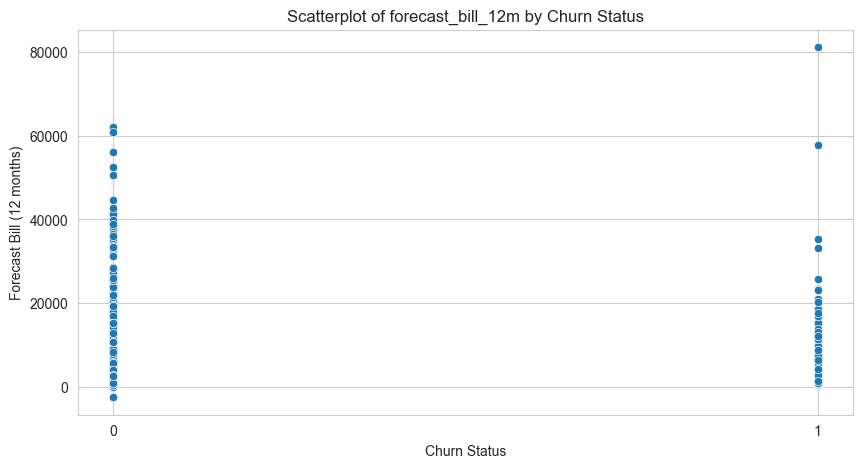

In [142]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='churn', y='forecast_bill_12m', data=df_main)

plt.title("Scatterplot of forecast_bill_12m by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Forecast Bill (12 months)")
plt.xticks([0,1])
plt.show()

Analisys after plotting graphs: Hypotesis denied. Costumers with estimates cost lower than 20.000 euros are more likely to churn. As a consequence, costumers with estimate cost higher than 20.000 euros are more likely to stay on.

 ## Hypothesis 2: 
 The higher the subscribed power, the lower the chances of churn.

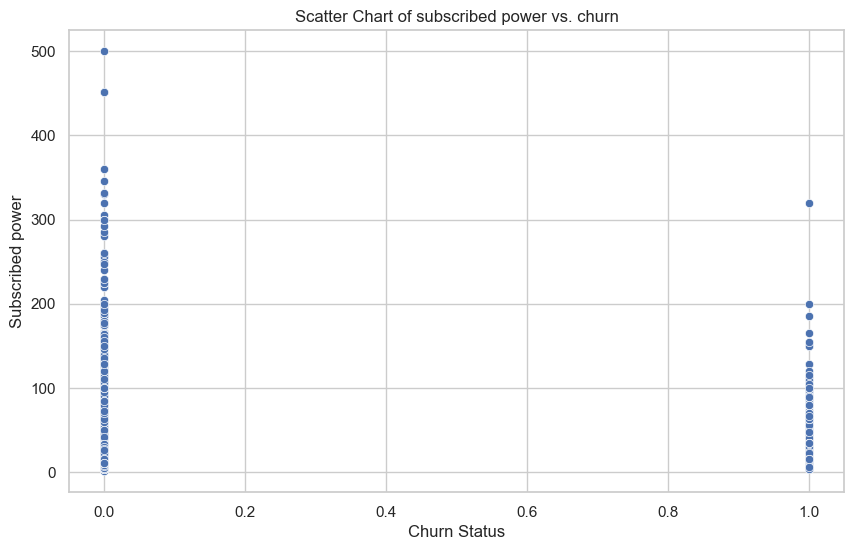

In [143]:
# Set the aesthetics of the plots
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_main, x='churn', y='pow_max')

#REVISAR HIPOTESE REVISAR HIPOTESE REVISAR HIPOTESE REVISAR HIPOTESE REVISAR HIPOTESE 

# Set the title and labels
plt.title("Scatter Chart of subscribed power vs. churn")
plt.xlabel("Churn Status")
plt.ylabel("Subscribed power")
plt.show()

Analisys after plotting graphs: Hypostesis accepted. Costumers that have a bigger subscribed power also have a lower chance to churn. Properly, costumers with lower 'pow_max' are more likely to churn.  

 ## Hypothesis 3: 
 The channel in which the customer purchased your contract affects your churn rate.  

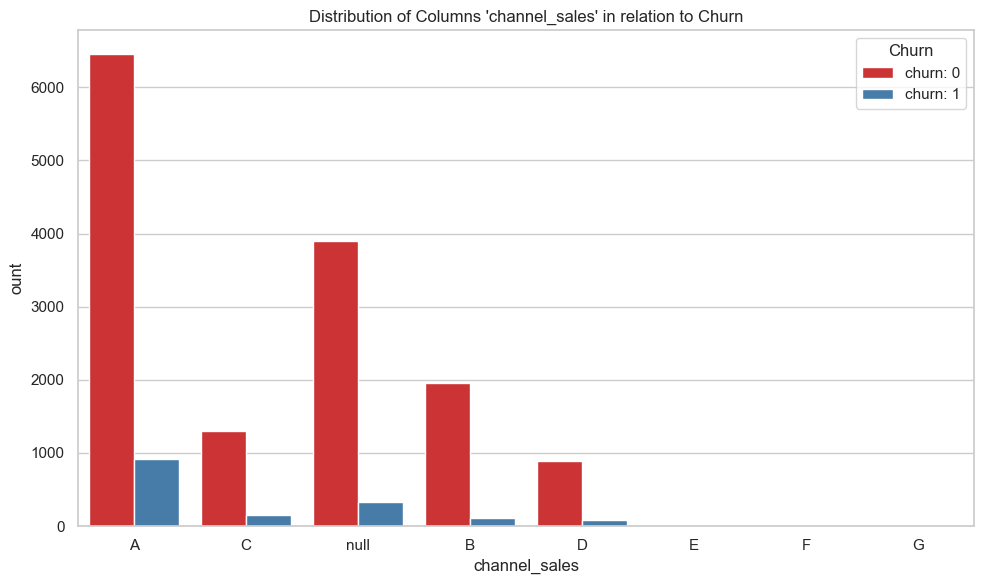

In [144]:
colors = sns.color_palette('Set1')
plt.figure(figsize=(10, 6))
sns.countplot(x='channel_sales', hue='churn', data=df_main, palette=colors)
plt.title("Distribution of Columns 'channel_sales' in relation to Churn")
plt.xlabel("channel_sales")
plt.ylabel("ount")
plt.legend(title="Churn", labels=["churn: 0", "churn: 1"])
plt.tight_layout()
plt.show()

Churn ratio for each sales channel: 

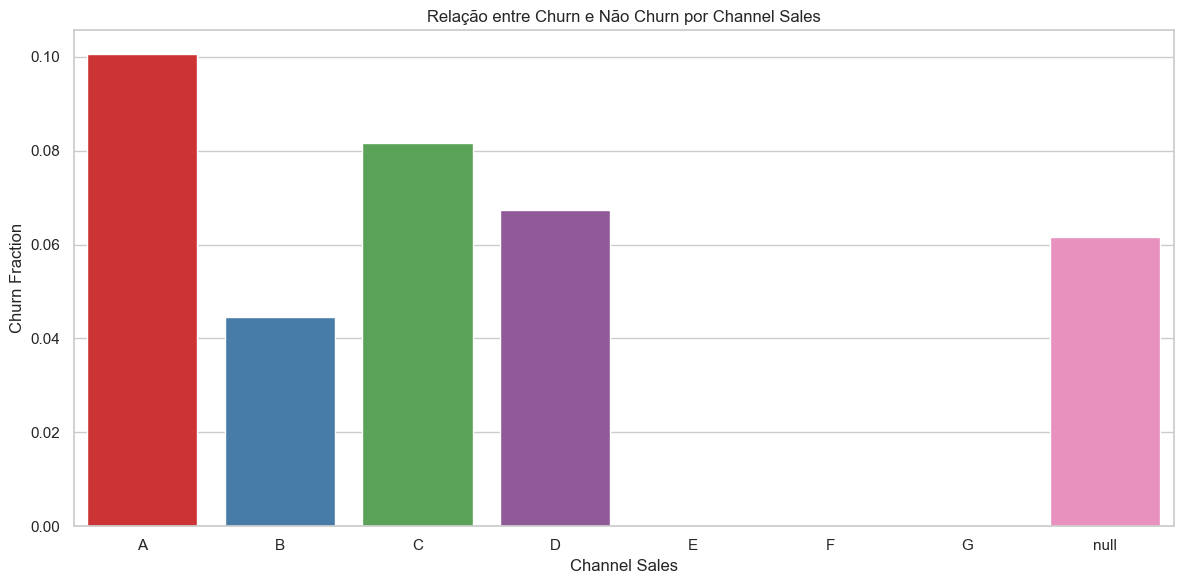

In [145]:
channel_sales_counts = df_main['channel_sales'].value_counts()
churn_counts = df_main[df_main['churn'] == 1]['channel_sales'].value_counts()
fractions = churn_counts / channel_sales_counts

prop_df = pd.DataFrame({'Channel Sales': fractions.index, 'Churn Fraction': fractions.values})

plt.figure(figsize=(12, 6))
sns.barplot(x='Channel Sales', y='Churn Fraction', data=prop_df, palette=colors)
plt.title("Relação entre Churn e Não Churn por Channel Sales")
plt.xlabel("Channel Sales")
plt.ylabel("Churn Fraction")
plt.tight_layout()

Analysis after plottign graphs: Hypotesis accepted. Churn has a variance depending on which sales channel is used. The biggest churn ratio come from A.

# Modeling

In [146]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

The metrics chosen to be analyzed were:
- accuracy
- AUC ROC
- recall
- f1_score
- confusion matrix

Accuracy: Even though accuracy is a simpler metric, we still kept it in our analysis so that we can have a baseline of how many hits each model had. This even helps us to assess whether the model is overfitting or underfitting if we compare the training accuracy with the test accuracy. In summary, accuracy is not the metric we will use to evaluate and choose the best model, but it does give us a good overview of how each model is doing.

AUC ROC: AUC ROC is a metric that evaluates the ability of a classification model to distinguish between positive and negative classes. This metric is especially important for our database due to its imbalance, obtaining a good AUC ROC metric is very important for our project because it is from it that we will know if the model was able to understand the difference between the classes even that has few samples of churn cases.

Recall: The recall measures the model's ability to correctly identify all positive examples, this metric, as well as the AUC ROC, is of paramount importance so that we can guarantee that the model is able to identify the minority class, in this case, the churns .

F1_Score: The F1 Score is a mean between Precision and Recall, as well as the other metrics, this is an important metric for our model because it more precisely demonstrates its situation in relation to classes than accuracy, being one of the main measures which will be used to assess the quality of the modeling.

Confusion matrix: The confusion matrix is one of our main benchmark metrics to check how good models are in the classification process. The confusion matrix gives us an overview of the TP, FP, TN, FN important data so that we can understand in which class the model is most wrong and how we can improve its classification.


In [147]:
def metrics(y_valid, y_pred, X_valid, model, modelName):
    accuracy = accuracy_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    confusion = confusion_matrix(y_valid, y_pred)

    print("Accuracy:", accuracy)
    print("AUC ROC:", roc_auc)
    print("Recall:", recall)
    print("F1:", f1)

    labels = ["Not churn", "churn"]

    sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion matrix - {modelName}')
    plt.show()

## Separation of training and testing data

In [148]:
train = df[df['churn'].notnull()]
test = df[df['churn'].isnull()]

train['churn'] = train['churn'].astype(int)
test = test.drop(columns=['churn'])

C:\Users\Inteli\AppData\Local\Temp\ipykernel_1384\2756277199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['churn'] = train['churn'].astype(int)


In [149]:
test.head(2)

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,has_gas,imp_cons,nb_prod_act,num_years_antig,origin_up_A,origin_up_B,origin_up_C,origin_up_D,origin_up_E,origin_up_F,origin_up_null,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0,0,1,0,0,0,0,0,0,0,0.002617,0.0,0.000708,0.038545,0.018332,0,0.016253,1,4,1,0,0,0,0,0,0,0.04,0.444805,0.527667,0.715945,0.685156,0.669687,0.967048
1,1,0,1,0,0,0,0,0,0,0,0.000220,0.0,0.000124,0.004992,0.003210,0,0.004415,1,5,1,0,0,0,0,0,0,0.03,0.524550,0.000000,0.000000,0.747665,0.000000,0.000000


In [150]:
train.head(2)

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,has_gas,imp_cons,nb_prod_act,num_years_antig,origin_up_A,origin_up_B,origin_up_C,origin_up_D,origin_up_E,origin_up_F,origin_up_null,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
4024,0,0,0,1,0,0,0,0,0,0,0.019213,0.000000,0.002209,0.255489,0.057163,0,0.045534,1,3,0,0,1,0,0,0,0,0.3600,0.371105,0.469315,0.653134,0.991787,0.996333,0.494878,0
4025,1,0,1,0,0,0,0,0,0,0,0.000000,0.013118,0.000000,0.000000,0.000000,1,0.000000,2,3,1,0,0,0,0,0,0,0.0873,0.440724,0.520378,0.704979,0.683661,0.668226,0.964937,1


In [151]:
X = train.drop('churn', axis=1)
y = train['churn']

In [152]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=8081, stratify=y)

In [153]:
display(X_valid.head())
display(X_valid.shape)

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,has_gas,imp_cons,nb_prod_act,num_years_antig,origin_up_A,origin_up_B,origin_up_C,origin_up_D,origin_up_E,origin_up_F,origin_up_null,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
15353,0,0,0,0,0,0,0,0,0,1,0.000231,0.001839,0.000089,0.005215,0.002292,1,0.003155,3,6,0,1,0,0,0,0,0,0.02640,0.522644,0.000000,0.000000,0.744674,0.000000,0.000000
14200,1,0,1,0,0,0,0,0,0,0,0.000347,0.000000,0.000146,0.005691,0.003780,0,0.005376,1,3,1,0,0,0,0,0,0,0.02630,0.530774,0.000000,0.000000,0.747727,0.000000,0.000000
6915,0,1,0,1,0,0,0,0,0,0,0.023276,0.000000,0.008607,0.005545,0.000000,0,0.000000,1,5,0,1,0,0,0,0,0,0.02078,0.533740,0.000000,0.000000,0.745920,0.000000,0.000000
16771,0,0,0,1,0,0,0,0,0,0,0.003519,0.000000,0.001085,0.025406,0.009762,0,0.009451,1,3,1,0,0,0,0,0,0,0.03960,0.440473,0.521695,0.711824,0.684014,0.668571,0.965436
18018,1,0,0,0,0,1,0,0,0,0,0.002474,0.000000,0.000528,0.037181,0.013668,0,0.012525,1,3,0,0,1,0,0,0,0,0.03960,0.430815,0.508743,0.690000,0.684471,0.669017,0.966080


(3220, 33)

In [154]:
display(X_train.head())
display(X_train.shape)

,no_activity_new,top1_activity_new,channel_sales_A,channel_sales_B,channel_sales_C,channel_sales_D,channel_sales_E,channel_sales_F,channel_sales_G,channel_sales_null,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,has_gas,imp_cons,nb_prod_act,num_years_antig,origin_up_A,origin_up_B,origin_up_C,origin_up_D,origin_up_E,origin_up_F,origin_up_null,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
6807,1,0,0,0,0,1,0,0,0,0,0.000009,0.0,0.000000,0.000207,0.000000,0,0.000000,1,5,0,1,0,0,0,0,0,0.02640,0.541048,0.000000,0.000000,0.750780,0.000000,0.000000
16741,1,0,1,0,0,0,0,0,0,0,0.002496,0.0,0.001845,0.039180,0.047738,0,0.045115,1,3,1,0,0,0,0,0,0,0.05912,0.440580,0.522232,0.714280,0.684242,0.668794,0.965758
6022,1,0,1,0,0,0,0,0,0,0,0.000627,0.0,0.000195,0.009865,0.005046,0,0.004793,1,3,1,0,0,0,0,0,0,0.03200,0.440365,0.521158,0.709368,0.683785,0.668347,0.965113
7031,0,0,0,0,0,0,0,0,0,1,0.008629,0.0,0.001837,0.101641,0.042144,0,0.037130,1,6,0,1,0,0,0,0,0,0.12800,0.426021,0.500789,0.670529,0.683785,0.668347,0.965113
12822,1,0,0,0,0,0,0,0,0,1,0.004906,0.0,0.001437,0.077654,0.037177,0,0.035279,1,6,0,0,1,0,0,0,0,0.10500,0.435165,0.513002,0.690965,0.683329,0.667901,0.964469


(12876, 33)

# PCA Technique - reduce dimensionality

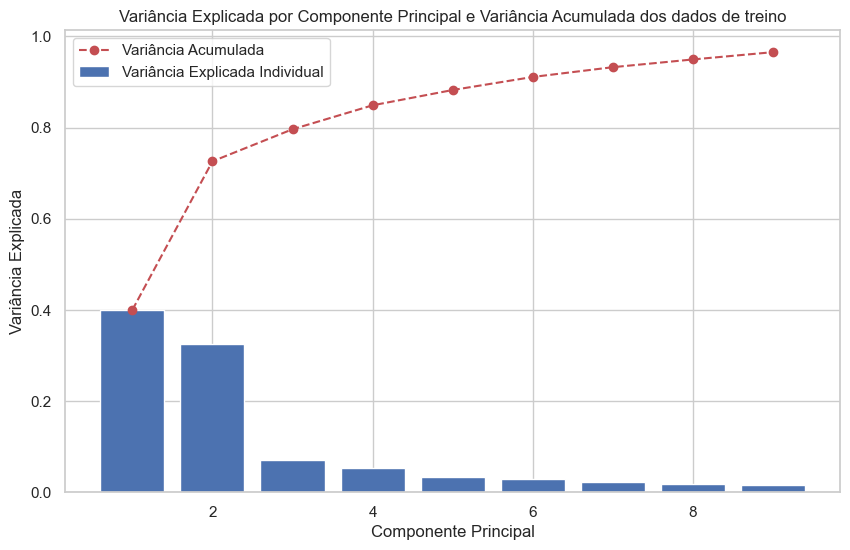

array([0.3999733 , 0.32601661, 0.07033065, 0.05253723, 0.03356239,
       0.02864457, 0.02145972, 0.01697613, 0.01599013])

In [155]:
# applying PCA technique to numeric columns 
from sklearn.decomposition import PCA

pca = PCA(.95, svd_solver='auto')

X_train_pca = pca.fit_transform(X_train) 
X_valid_pca = pca.fit_transform(X_valid) 

variancia_explicada = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(variancia_explicada)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(variancia_explicada) + 1), variancia_explicada, label='Variância Explicada Individual')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r', label='Variância Acumulada')
plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada')
plt.title('Variância Explicada por Componente Principal e Variância Acumulada dos dados de treino')
plt.legend()
plt.grid(True)
plt.show()

display(pca.explained_variance_ratio_)


In [156]:
# creating a df with pca's array 
X_train_pca = pd.DataFrame(X_train_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9'])
X_valid_pca = pd.DataFrame(X_valid_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9'])

display(X_train_pca.head())
display(X_valid_pca.head())

display(X_train_pca.shape)
display(X_valid_pca.shape)

display(X_train.shape)
display(X_valid.shape)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,0.018007,-0.361195,-1.019180,-0.463974,-0.196557,-0.528079,-0.146066,0.107808,0.126457
1,-2.141034,-0.296234,0.864111,0.207090,0.338450,-0.523772,-0.054876,0.063794,0.099566
2,-2.141360,-0.296265,0.859158,0.208757,0.338249,-0.523539,-0.054921,0.063796,0.099610
3,1.227185,-0.402523,0.522553,-0.924197,-0.337983,-0.405010,0.407791,-0.615124,0.253470
4,1.237904,-0.415950,0.469387,-0.530960,1.156214,-0.144882,0.029253,-0.118701,0.116607


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,1.157708,1.691349,-0.797856,0.448224,0.606972,0.062127,0.479197,-0.654462,-0.573357
1,-2.240714,-0.364290,-0.413791,-0.643605,-0.192706,-0.046342,-0.038808,-0.060616,0.061345
2,-0.000844,-0.349042,-0.709464,0.843520,1.210031,0.508242,-0.271290,0.387558,0.099868
3,-2.031016,-0.302375,0.937744,0.716061,0.225524,0.321309,0.445700,0.601693,0.291389
4,-1.861880,-0.327837,0.428191,1.172765,-1.177527,-0.009994,-0.310899,0.162866,0.142485


(12876, 9)

(3220, 9)

(12876, 33)

(3220, 33)

## Catboost
We are going to perform a test with catboost because it is a machine learning algorithm used precisely in cases of unbalanced databases, this is exactly the case of our dataframe, so it is interesting to evaluate its results and compare with the balancing tests.  

Catboost is a machine learning model that uses an iterative process of "weak decision trees", in which each new tree uses the errors and information obtained by the previous one to improve the next one. In this way, catboost becomes efficient to deal with unbalanced databases because its first trees will make many errors precisely because the classes are in different amounts.

In [157]:
from catboost import CatBoostClassifier

In [158]:
catB = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=200, random_state=8081)
catB.fit(X_train, y_train, eval_set=(X_valid, y_valid))
y_pred = catB.predict(X_valid)

0:	learn: 0.6082784	test: 0.6089228	best: 0.6089228 (0)	total: 158ms	remaining: 2m 37s
200:	learn: 0.2548179	test: 0.3098239	best: 0.3084222 (154)	total: 3.06s	remaining: 12.2s
400:	learn: 0.2133225	test: 0.3151951	best: 0.3084222 (154)	total: 6.09s	remaining: 9.11s
600:	learn: 0.1821850	test: 0.3198215	best: 0.3084222 (154)	total: 9.65s	remaining: 6.41s


800:	learn: 0.1563968	test: 0.3269865	best: 0.3084222 (154)	total: 13.7s	remaining: 3.4s
999:	learn: 0.1346630	test: 0.3337547	best: 0.3084222 (154)	total: 16.6s	remaining: 0us

bestTest = 0.3084222407
bestIteration = 154

Shrink model to first 155 iterations.


Accuracy: 0.901863354037267
AUC ROC: 0.6407594830017539
Recall: 0.009404388714733543
F1: 0.018633540372670808


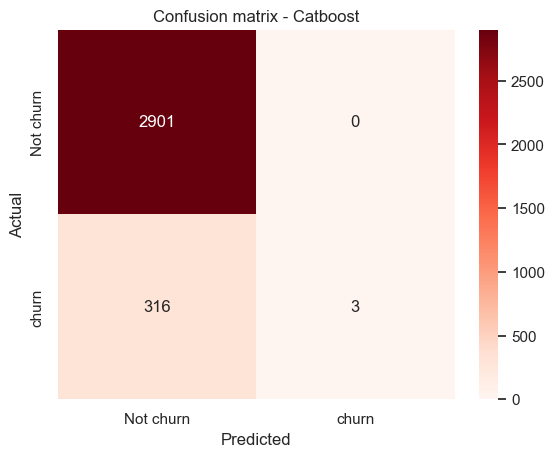

In [159]:
metrics(y_valid, y_pred, X_valid, catB, 'Catboost')

Through this test, we can see that even if the catboost model is adapted for unbalanced databases, it still did not have as much facility to distinguish the "churn" and "non-churn" classes. Most of the "churn" were not classified correctly. Based on this, we will perform tests with a more balanced database through balancing techniques.

### Hyperparameter tuning - catboost
A grid search will be performed at this stage to verify which are the best hyperparameters for Catboost, one of the main hyperparameters being taken into account is the "class_weights", because we are using an unbalanced database and this hyperparameter adds greater importance to a class in relation to the other. So what we hope is that this makes the model more capable of differentiating the different classes from the database.

In [160]:
param_grid = {
    'iterations': [1000],
    'verbose': [200],
    'class_weights': [{0: 1.0, 1: i} for i in [1, 2, 5]]
}

In [161]:
catB_gs = CatBoostClassifier(random_state=8081)
gs = GridSearchCV(catB_gs, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
gs.fit(X_train, y_train)

print("best hyperparameters:", gs.best_params_)

Learning rate set to 0.030677
0:	learn: 0.6657022	total: 15.9ms	remaining: 15.9s
200:	learn: 0.2939522	total: 2.28s	remaining: 9.06s
400:	learn: 0.2761079	total: 4.45s	remaining: 6.64s
600:	learn: 0.2591516	total: 6.62s	remaining: 4.39s
800:	learn: 0.2440135	total: 8.75s	remaining: 2.17s
999:	learn: 0.2317885	total: 10.8s	remaining: 0us
best hyperparameters: {'class_weights': {0: 1.0, 1: 1}, 'iterations': 1000, 'verbose': 200}


In [162]:
best_catB_gs = gs.best_estimator_
best_catB_gs.fit(X_train, y_train)
y_pred = best_catB_gs.predict(X_valid)

Learning rate set to 0.030677
0:	learn: 0.6657022	total: 21.3ms	remaining: 21.3s


200:	learn: 0.2939522	total: 2.27s	remaining: 9.03s
400:	learn: 0.2761079	total: 4.44s	remaining: 6.63s
600:	learn: 0.2591516	total: 6.62s	remaining: 4.39s
800:	learn: 0.2440135	total: 9.15s	remaining: 2.27s
999:	learn: 0.2317885	total: 11.6s	remaining: 0us


Accuracy: 0.9027950310559006
AUC ROC: 0.6381466125074156
Recall: 0.025078369905956112
F1: 0.0486322188449848


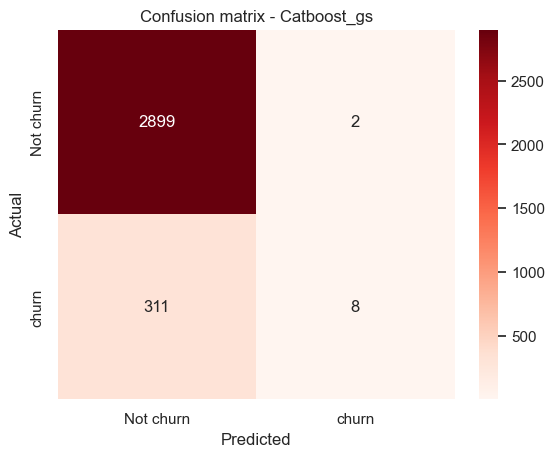

In [163]:
metrics(y_valid, y_pred, X_valid, best_catB_gs, 'Catboost_gs')

## Random forest
We're going to test with a random forest because it's a complex predictive model that handles large, high-dimensional datasets well.

In [164]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
rfc = RandomForestClassifier(random_state=8081)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_valid)

Accuracy: 0.90527950310559
AUC ROC: 0.6194232018145294
Recall: 0.05329153605015674
F1: 0.10029498525073746


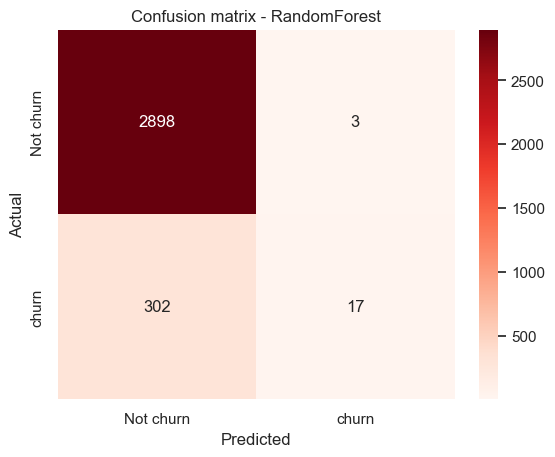

In [166]:
metrics(y_valid, y_pred, X_valid, rfc, 'RandomForest')

## KNN

We are going to perform a test with catboost because it is a machine learning algorithm used for classification and regression tasks. In this model we can control the number of nearest neighbors to be considered when making a forecast, which allows us to adjust the model to find a balance between bias and variance.

In [167]:
from sklearn.neighbors import KNeighborsClassifier

In [168]:
X_train = np.ascontiguousarray(X_train)
X_valid = np.ascontiguousarray(X_valid)

In [169]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)

Accuracy: 0.8922360248447205
AUC ROC: 0.5688909564208212
Recall: 0.0438871473354232
F1: 0.07466666666666666


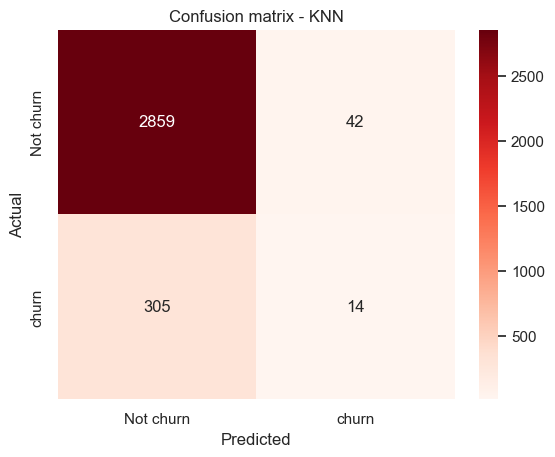

In [170]:
metrics(y_valid, y_pred, X_valid, knn, 'KNN')

Through this test, we can see that KNN modell did not have as much facility to distinguish the "churn" and "non-churn" classes. Most of the "churn" were not classified correctly and it was less acurate than others models we have tested. Based on this, we will perform tests with a more balanced database through balancing techniques and keep testing different models.

## GradientBoostingClassifier

We are going to perform a test with XGBoost because it can efficiently (and robustly) handle a wide variety of different types of data. This model is a Decision Tree based algorithm with Gradient Boosting, which means that the model uses the Gradient Descent algorithm to minimize loss as new models are added.

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

In [172]:
xgb = GradientBoostingClassifier(random_state=8081)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_valid)

Accuracy: 0.9009316770186335
AUC ROC: 0.6370136122124141
Recall: 0.003134796238244514
F1: 0.006230529595015576


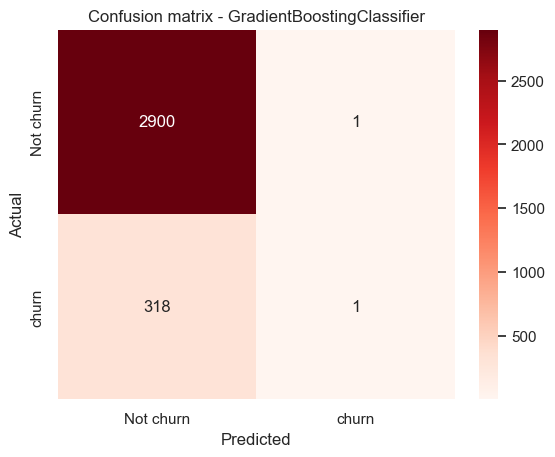

In [173]:
metrics(y_valid, y_pred, X_valid, xgb, 'GradientBoostingClassifier')

Through this test, we can see that the XGBoost model was not so easy to distinguish the “churn” and “non-churn” classes, but it had a higher result than the KNN, despite not being a significant percentage change. One small difference we noticed is that he had fewer false churns and only one true churn. Based on this, we will perform tests with a more balanced database through balancing techniques and continue testing different models.

## Xgboost

In [174]:
import xgboost as xgb

In [175]:
xgb = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_valid)

Accuracy: 0.9009316770186335
AUC ROC: 0.6431313815687814
Recall: 0.0
F1: 0.0


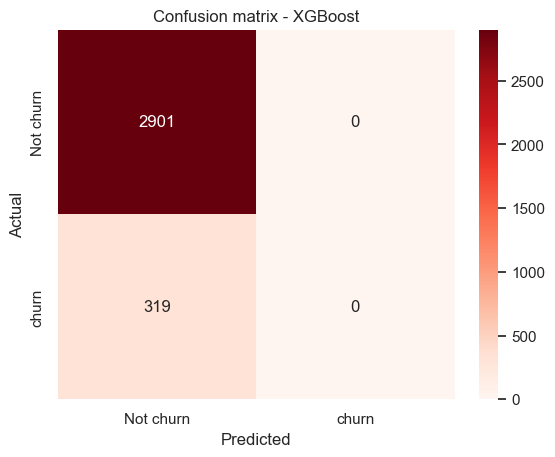

In [176]:
metrics(y_valid, y_pred, X_valid, xgb, 'XGBoost')

## Logistic Regression

We are going to perform a test with the logistic regression model as this model is a good choice when we are dealing with a binary classification problem, where the goal is to predict a binary output (in our case, churn/not churn).

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
lg = LogisticRegression(random_state=8081)
lg.fit(X_train, y_train)
y_pred = lg.predict(X_valid)

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9009316770186335
AUC ROC: 0.6188872283797933
Recall: 0.0
F1: 0.0


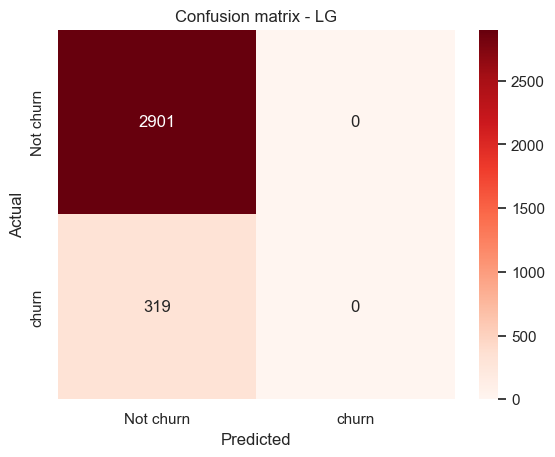

In [179]:
metrics(y_valid, y_pred, X_valid, lg, 'LG')

The linear regression model had a result very close to the XGBoost model, although the XGBoost model had a slightly better result, we can still do more tests with this model and adapt it with more parameters to improve the result.

## Tests with balancing

### SMOTE

#### SMOTE - Simple

In [180]:
from imblearn.over_sampling import SMOTE

In [181]:
smote = SMOTE(random_state=8081)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

#### SMOTE - Catboost

In [182]:
catB_SMOTE = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=200, random_state=8081)
catB_SMOTE.fit(X_train_SMOTE, y_train_SMOTE, eval_set=(X_valid, y_valid))
y_pred = catB_SMOTE.predict(X_valid)

0:	learn: 0.6805730	test: 0.6819205	best: 0.6819205 (0)	total: 34.8ms	remaining: 34.8s
200:	learn: 0.3099883	test: 0.4180080	best: 0.4180080 (200)	total: 2.46s	remaining: 9.77s
400:	learn: 0.2265701	test: 0.3863750	best: 0.3863750 (400)	total: 4.88s	remaining: 7.29s
600:	learn: 0.1847078	test: 0.3780910	best: 0.3779718 (590)	total: 7.32s	remaining: 4.86s
800:	learn: 0.1561256	test: 0.3760079	best: 0.3751976 (704)	total: 9.85s	remaining: 2.45s
999:	learn: 0.1334743	test: 0.3774516	best: 0.3751976 (704)	total: 12.3s	remaining: 0us

bestTest = 0.375197577
bestIteration = 704

Shrink model to first 705 iterations.


Accuracy: 0.8667701863354037
AUC ROC: 0.6130498725442205
Recall: 0.13166144200626959
F1: 0.16374269005847952


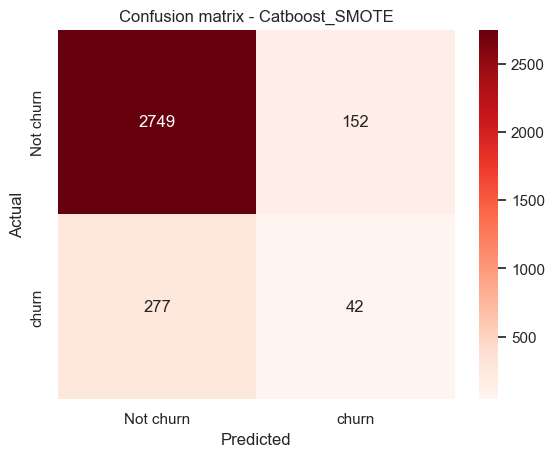

In [183]:
metrics(y_valid, y_pred, X_valid, catB_SMOTE, 'Catboost_SMOTE')

Even after balancing using SMOTE, the catboost model did not have significant improvements, its number of "churn" class hits had a small increase, but the model also had a brief loss of accuracy.
Possibly this happened due to the nature of the catboost model, which is better adapted to unbalanced databases, that is, in theory, the balancing of classes does not make much difference.

#### SMOTE - Random forest

In [184]:
rfc_SMOTE = RandomForestClassifier(random_state=8081)
rfc_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = rfc_SMOTE.predict(X_valid)

Accuracy: 0.8515527950310559
AUC ROC: 0.5968129031282047
Recall: 0.1536050156739812
F1: 0.17013888888888887


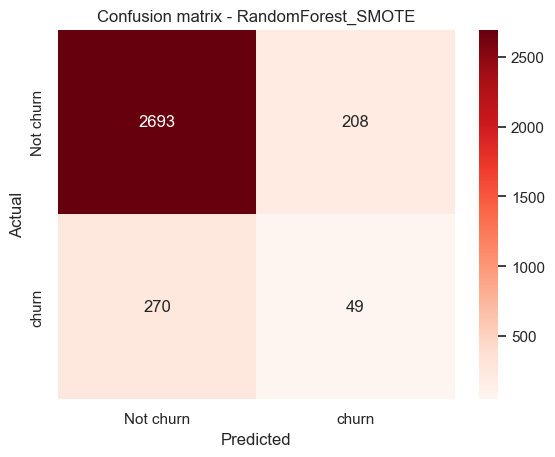

In [185]:
metrics(y_valid, y_pred, X_valid, rfc_SMOTE, 'RandomForest_SMOTE')

#### SMOTE - Ada Boost

##### SMOTE - Ada Boost - Random forest

In [186]:
from sklearn.ensemble import AdaBoostClassifier

In [187]:
ada_b_rfc = AdaBoostClassifier(RandomForestClassifier(), n_estimators=100, random_state=8081)
ada_b_rfc.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = ada_b_rfc.predict(X_valid)

Accuracy: 0.8531055900621118
AUC ROC: 0.5995095194717203
Recall: 0.14420062695924765
F1: 0.16283185840707964


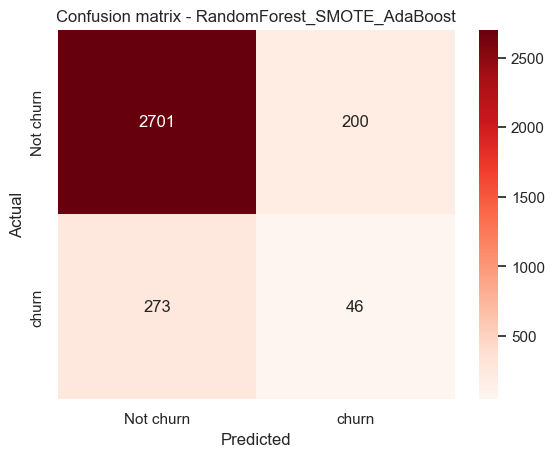

In [188]:
metrics(y_valid, y_pred, X_valid, ada_b_rfc, 'RandomForest_SMOTE_AdaBoost')

#### SMOTE - ADASYN

In [189]:
from imblearn.over_sampling import ADASYN

In [190]:
adasyn = ADASYN(sampling_strategy='auto', random_state=8081)
X_train_ADASYN, y_train_ADASYN = adasyn.fit_resample(X_train, y_train)

##### SMOTE - ADASYN - Random Forest

In [191]:
rfc_ADASYN = RandomForestClassifier(random_state=8081)
rfc_ADASYN.fit(X_train_ADASYN, y_train_ADASYN)
y_pred = rfc_ADASYN.predict(X_valid)

Accuracy: 0.8490683229813665
AUC ROC: 0.6077906332158731
Recall: 0.15673981191222572
F1: 0.1706484641638225


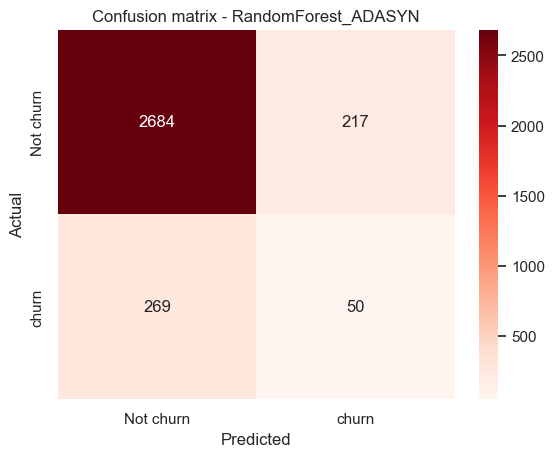

In [192]:
metrics(y_valid, y_pred, X_valid, rfc_ADASYN, 'RandomForest_ADASYN')

#### SMOTE - ENN

In [193]:
from imblearn.combine import SMOTEENN

In [194]:
smote_enn = SMOTEENN(sampling_strategy='auto', random_state=8081)
X_train_SMOTE_ENN, y_train_SMOTE_ENN = smote_enn.fit_resample(X_train, y_train)

##### SMOTE - ENN - Random forest

In [195]:
rfc_SMOTE_ENN = RandomForestClassifier(random_state=8081)
rfc_SMOTE_ENN.fit(X_train_SMOTE_ENN, y_train_SMOTE_ENN)
y_pred = rfc_SMOTE_ENN.predict(X_valid)

Accuracy: 0.7760869565217391
AUC ROC: 0.6014043368463365
Recall: 0.25705329153605017
F1: 0.18531073446327684


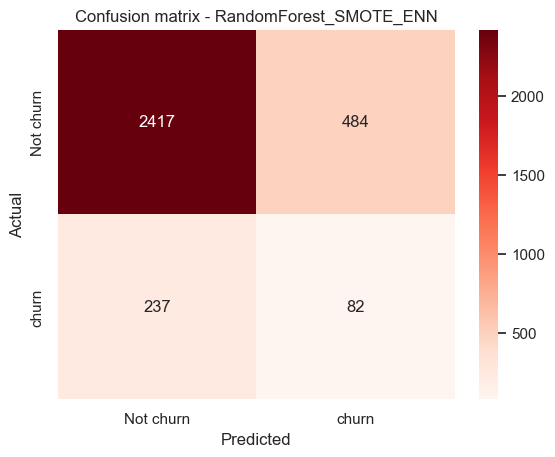

In [196]:
metrics(y_valid, y_pred, X_valid, rfc_SMOTE_ENN, 'RandomForest_SMOTE_ENN')

### Random undersampling

In [197]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [198]:
ru = RandomUnderSampler(random_state=8081)

X_train_ru, y_train_ru = ru.fit_resample(X_train, y_train)

print(Counter(y_train_ru))

Counter({0: 1276, 1: 1276})


#### RU - Random forest

In [199]:
rfc_ru = RandomForestClassifier(random_state=8081)
rfc_ru.fit(X_train_ru, y_train_ru)
y_pred = rfc_ru.predict(X_valid)

Accuracy: 0.5835403726708075
AUC ROC: 0.614402232934487
Recall: 0.5830721003134797
F1: 0.2171628721541156


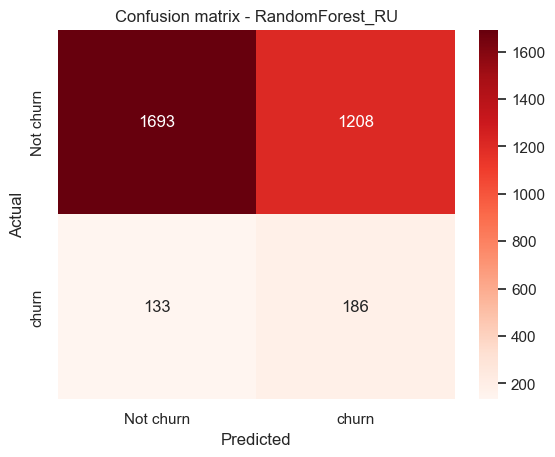

In [200]:
metrics(y_valid, y_pred, X_valid, rfc_ru, 'RandomForest_RU')

### Random oversampling

In [201]:
from imblearn.over_sampling import RandomOverSampler

In [202]:
ro = RandomOverSampler(random_state=8081)

X_train_ro, y_train_ro = ro.fit_resample(X_train, y_train)

print(Counter(y_train_ro))

Counter({0: 11600, 1: 11600})


#### RO - Random forest

In [203]:
rfc_ro = RandomForestClassifier(random_state=8081)
rfc_ro.fit(X_train_ro, y_train_ro)
y_pred = rfc_ro.predict(X_valid)

Accuracy: 0.8990683229813664
AUC ROC: 0.613237895483019
Recall: 0.08463949843260188
F1: 0.14248021108179418


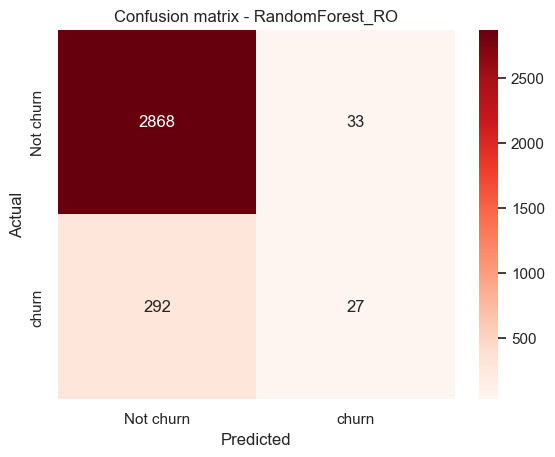

In [204]:
metrics(y_valid, y_pred, X_valid, rfc_ro, 'RandomForest_RO')

### RU and RO - pipeline

In [205]:
from imblearn.pipeline import Pipeline

In [206]:
ro = RandomOverSampler(random_state=8081)
ru = RandomUnderSampler(random_state=8081)

#### RU_RO - Random forest

In [207]:
pipeline_rfc = Pipeline([
    ('oversampling', ro),
    ('undersampling', ru),
    ('classifier', RandomForestClassifier(random_state=8081))
])

In [208]:
pipeline_rfc.fit(X_train, y_train)
y_pred = pipeline_rfc.predict(X_valid)

Accuracy: 0.8984472049689441
AUC ROC: 0.6175100143826742
Recall: 0.08150470219435736
F1: 0.13720316622691295


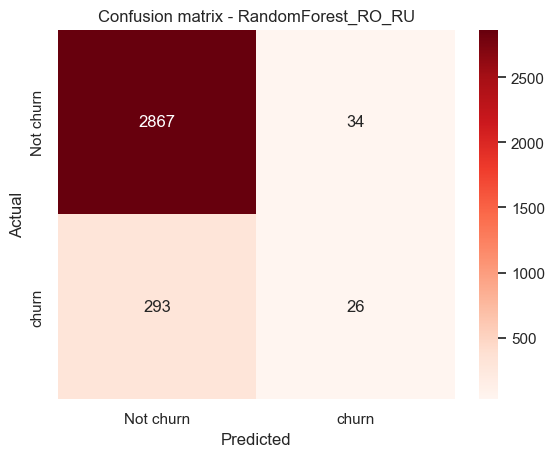

In [209]:
metrics(y_valid, y_pred, X_valid, pipeline_rfc, 'RandomForest_RO_RU')

# Hyperparameter tuning 

In [210]:
from sklearn.model_selection import GridSearchCV

def tune_hyperparameters(model, param_grid, X_train, y_train):
    # creating a GridSearchCV object for hyperparameter optimization
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
    
    # performs hyperparameter search
    grid_search.fit(X_train, y_train)
    
    # return the best model with the adjusted hyperparameters
    best_model = grid_search.best_estimator_
    
    return best_model, grid_search

## KNN hyperparameter test

In [211]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
params = knn_model.get_params()
print(params)

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

best_knn_model, gs = tune_hyperparameters(KNeighborsClassifier(), param_grid_knn, X_train, y_train)
gs.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}

In [212]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

best_knn_model, gs = tune_hyperparameters(KNeighborsClassifier(), param_grid_knn, X_train, y_train)

In [213]:
best_knn_model = gs.best_estimator_
best_knn_model.fit(X_train, y_train)
y_pred = best_knn_model.predict(X_valid)

Accuracy: 0.8959627329192547
AUC ROC: 0.5725114785842953
Recall: 0.0219435736677116
F1: 0.040114613180515755


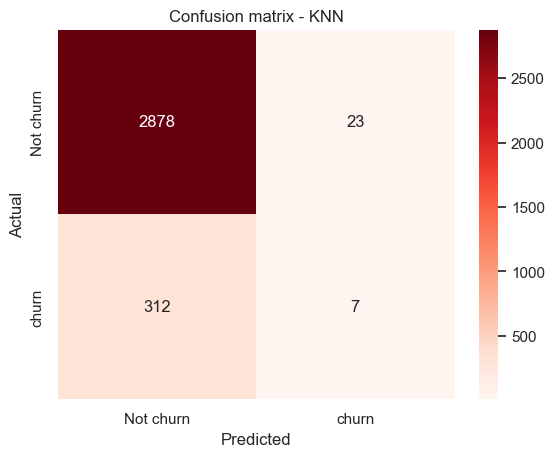

In [214]:
metrics(y_valid, y_pred, X_valid, best_knn_model, 'KNN')

The result of testing the KNN model with hyperparameters had metrics very similar to the metrics of testing the model without hyperparameters. On the other hand, the result in the confusion matrix was fewer hits in true positives, which is a poor indication of the potential use of this model in our project. Based on this, we decided not to continue testing with the KNN model.

## XGBoost hyperparameter test

In [215]:
import xgboost as xgb

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

best_xgb_model, gs = tune_hyperparameters(xgb.XGBClassifier(), param_grid_xgb, X_train, y_train)

In [216]:
best_xgb_model = gs.best_estimator_
best_xgb_model.fit(X_train, y_train)
y_pred = best_xgb_model.predict(X_valid)

Accuracy: 0.9024844720496894
AUC ROC: 0.6323541012233378
Recall: 0.02821316614420063
F1: 0.05421686746987952


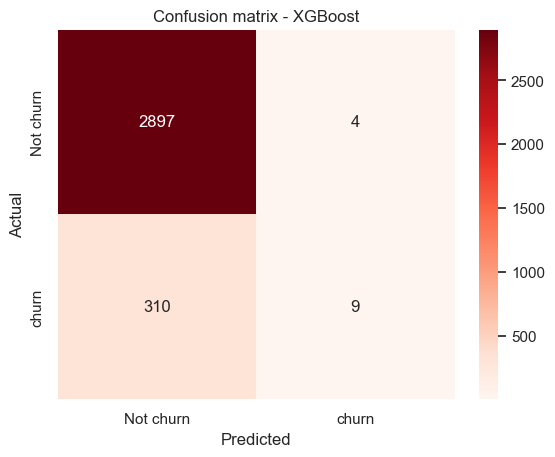

In [217]:
metrics(y_valid, y_pred, X_valid, best_xgb_model, 'XGBoost')

The result of testing the XGBoost model with hyperparameters had metrics very similar to the metrics of testing the model without hyperparameters. On the other hand, the result in the confusion matrix had a small improvement in true positives, despite this the result is still not satisfactory and we do not consider that this model has great potential to collaborate with our project, which is why we decided not to continue the tests with the XGBoost model.

## Logistic Regression hyperparameter test

In [218]:
from sklearn.linear_model import LogisticRegression

param_grid_logistic = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2']
}

best_logistic_model, gs = tune_hyperparameters(LogisticRegression(), param_grid_logistic, X_train, y_train)

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

In [219]:
best_logistic_model = gs.best_estimator_
best_logistic_model.fit(X_train, y_train)
y_pred = best_logistic_model.predict(X_valid)

Accuracy: 0.9009316770186335
AUC ROC: 0.618491731853355
Recall: 0.0
F1: 0.0


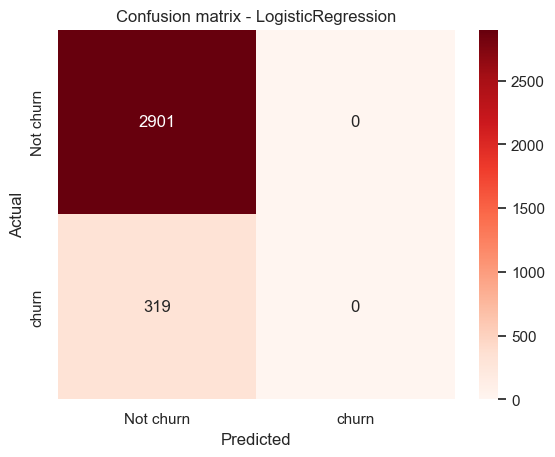

In [220]:
metrics(y_valid, y_pred, X_valid, best_logistic_model, 'LogisticRegression')

The result of the test of the Logistic Regression model with hyperparameters had the same metrics as the test of the model without the hyperparameters, without any change in the d matrix. Based on this, we decided not to continue testing with the Logistic Regression model.

## Randon Forest hyperparameter test

In [221]:
from sklearn.model_selection import RandomizedSearchCV

def tune_hyperparameters_random(model, param_random, X_train, y_train, n_iter=10, cv=3):
    # creating a RandomizedSearchCV object for hyperparameter optimization
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_random, n_iter=n_iter, cv=cv, random_state=42)
    
    # performs random hyperparameter search
    random_search.fit(X_train, y_train)
    
    # return the best model with the adjusted hyperparameters
    best_model = random_search.best_estimator_
    
    return best_model, random_search

In [222]:
from sklearn.ensemble import RandomForestClassifier

# defines the model and hyperparameters to be randomly tuned
model = RandomForestClassifier()
param_random = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
best_random_model, random_search = tune_hyperparameters_random(model, param_random, X_train, y_train, n_iter=100, cv=2)


In [223]:
best_random_model = random_search.best_estimator_
best_random_model.fit(X_train, y_train)
y_pred = best_random_model.predict(X_valid)

Accuracy: 0.9055900621118013
AUC ROC: 0.6186997457367961
Recall: 0.05329153605015674
F1: 0.10059171597633135


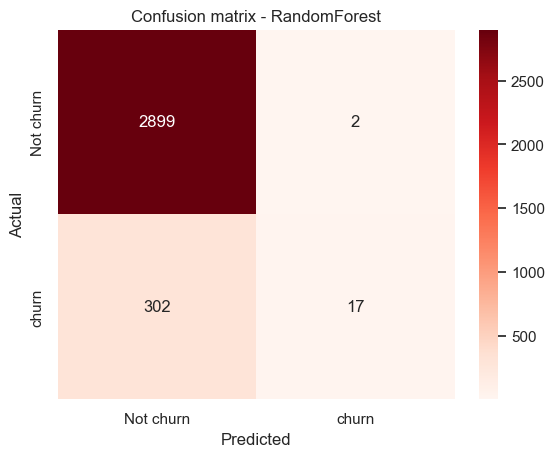

In [224]:
metrics(y_valid, y_pred, X_valid, best_random_model, 'RandomForest')

The result of testing the Random Forest model with hyperparameters presented metrics very similar to the metrics of testing the model without hyperparameters. Just like the other models, we will not use them individually in our project, but we will use all models with hyperparameters in the Post-processing model.

# First chosen model

It is important to explain at this stage that a series of tests were carried out with different techniques for balancing the database, and even with all that, the confusion matrix and the model's metrics did not leave the pattern we were having previously. The models become very capable of identifying the "non-churns", but have a very difficult time identifying the "churns" themselves.

It is important to keep this in mind because the "first best model chosen" does not differ much from most of the other models tested, it has a high rate of success of "non-churns" and makes a lot of mistakes in the classification of "churns" as well as the others. The hypothesis we have is that the model does not have enough samples of "churns" to be able to identify them, and even those that it manages to analyze are very close to examples of "non-churns", making it extremely difficult to differentiation.

Precisely because of this, this model does not present such good metrics nor a good enough confusion matrix. However, the main takeaway from these tests is that the model has become very good at getting churns wrong, so good that if we simply reversed these results it would be able to get it right most of the time.

As a result, we came to the conclusion that it would be interesting to change our approach. Instead of simply making a model that is able to predict churns, it would be interesting to train models that are able to identify false "non-churns". Through this still-to-be-tested approach, maybe we'll be able to find a more appropriate answer to the problem since as difficult as getting it right 90% of the time is also getting it wrong 90% of the time.

For now, the model we present is a random forest that was the most used model for testing most balancing techniques. And, at the end, we present a reversal of their values to show that simply changing them, the model would be able to have a great performance and predict most of the churns.

In [225]:
from sklearn.ensemble import RandomForestClassifier

In [226]:
def modeling(model, X_train, y_train, X_valid, y_valid, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)

    accuracy = accuracy_score(y_valid, y_pred)
    roc_auc = roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    confusion = confusion_matrix(y_valid, y_pred)

    print(confusion)

    print("Accuracy:", accuracy)
    print("AUC ROC:", roc_auc)
    print("Recall:", recall)
    print("F1 Score:", f1)

    labels = ["Not churn", "churn"]

    sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion matrix - {name}')
    plt.show()

[[2898    3]
 [ 302   17]]
Accuracy: 0.90527950310559
AUC ROC: 0.6194232018145294
Recall: 0.05329153605015674
F1 Score: 0.10029498525073746


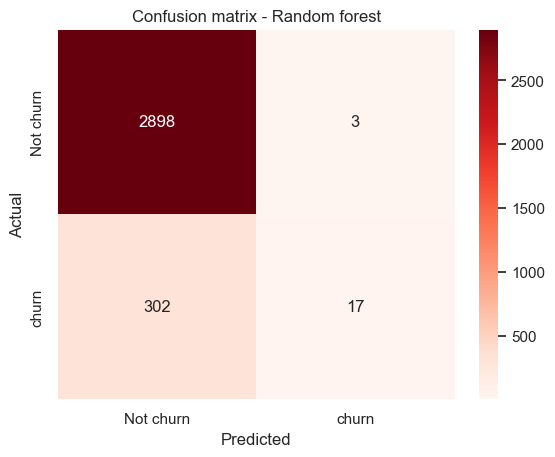

In [227]:
modeling(RandomForestClassifier(random_state=8081), 
X_train, y_train, X_valid, y_valid, 'Random forest')

As previously presented, the model does not have such good metrics, although it presents a good level of accuracy, this is mainly due to the fact that the database is unbalanced. However, the other metrics were not good, they reveal that the model has a lot of difficulty separating the different classes and getting the true positives right.

# Final Chosen model

## Feature importance

In [228]:
import xgboost as xgb

In [229]:
# Training xgboost
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [230]:
# Obtaining the importance of features
importances = xgboost.feature_importances_

In [231]:
# Creating a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

               Feature  Importance
19         origin_up_A    0.143833
1    top1_activity_new    0.052842
20         origin_up_B    0.043313
5      channel_sales_D    0.042217
10            cons_12m    0.038772
12     cons_last_month    0.038703
13   forecast_cons_12m    0.036567
18     num_years_antig    0.035773
29        price_p3_var    0.035590
28        price_p2_var    0.035120
9   channel_sales_null    0.034445
27        price_p1_var    0.034113
31        price_p2_fix    0.032660
15             has_gas    0.031754
26             pow_max    0.031267
4      channel_sales_C    0.031169
14  forecast_cons_year    0.031096
3      channel_sales_B    0.030589
16            imp_cons    0.030464
11        cons_gas_12m    0.029698
2      channel_sales_A    0.029248
30        price_p1_fix    0.029218
32        price_p3_fix    0.028500
21         origin_up_C    0.027576
0      no_activity_new    0.027170
17         nb_prod_act    0.021192
25      origin_up_null    0.017111
23         origin_up